data source: https://www.kaggle.com/datasets/assemelqirsh/covid19-dataset

In [1]:
# Import the 'drive' module from the 'google.colab' package to enable Google Drive integration.
# Then, mount Google Drive to the '/drive' directory within the Colab environment.
# The 'force_remount=True' parameter ensures that the Drive is remounted even if it was previously mounted.

from google.colab import drive
drive.mount('/drive', force_remount=True)

# Change the current working directory to the specified folder within Google Drive,
# where you can save and load your Colab notebooks or files.
%cd '/drive/MyDrive/Colab Notebooks'

Mounted at /drive
/drive/MyDrive/Colab Notebooks


## **For detailed explains, please see the Final Project Report**

###    Interpretation and Insights
Provide clear and thoughtful interpretation of your results. Go beyond the numbers and graphs to explain what the data reveals.
Provide meaningful insights and conclusions that are well-grounded in your analysis, making connections to real-world implications or potential applications.


In [2]:
## Data Cleaning##

import pandas as pd
import matplotlib.pyplot as plt

# Load and inspect the dataset
# understand its structure and data types

def load_and_inspect_covid_data():
    # Read the data from 'covid_data.csv'
    covid_df = pd.read_csv('covid_data.csv')
    print("Preview of the dataset:")
    print(covid_df.head())

    # Confirm the shape and info of the dataset
    print(covid_df.shape)
    print(covid_df.info())
    return covid_df

load_and_inspect_covid_data()

# We selected 10 countries due to completness: 'China', 'United States', 'Canada', 'Australia', 'Brazil', 'Afghanistan', 'Japan', 'South Korea', 'Denmark','India'
# Identify and handle missing data
def filter_and_save_countries_data(covid_df, countries, output_file='filtered_covid_data.csv'):
    # Filter the dataset for the specified countries
    countries = ['China', 'United States', 'Canada', 'Australia', 'Brazil', 'Afghanistan', 'Japan', 'South Korea', 'Denmark','India']
    countries_filtered_data = covid_df[covid_df['location'].isin(countries)]

    # Preview the filtered data
    print(countries_filtered_data.head())
    return countries_filtered_data

# Detect and handle outliers
# I have removed outliers lower than 50% completeness
def clean_and_save_filtered_data(input_file='filtered_covid_data.csv', output_file='step1_cleaned.csv', completeness_threshold=50):
    # Load the filtered data
    filtered_countries = pd.read_csv(input_file)

    # Calculate completeness for each column
    column_complete = filtered_countries.notnull().mean() * 100
    sorted_complete = column_complete.sort_values(ascending=False)
    print("Column completeness (sorted):")
    print(sorted_complete)

    # Identify columns to drop
    column_drop = column_complete[(column_complete < completeness_threshold) & (column_complete.index != 'positive_rate')].index
    filtered_countries_cleaned = filtered_countries.drop(columns=column_drop)

    # Print dropped columns
    print(f"Dropped columns: {list(column_drop)}")

    # Save the cleaned dataset to a new CSV file
    filtered_countries_cleaned.to_csv(output_file, index=False)
    print(f"Cleaned data saved to '{output_file}'")

    return filtered_countries_cleaned

# Calling the functions
covid_df = load_and_inspect_covid_data()
filtered_countries = filter_and_save_countries_data(covid_df, countries=None)
filtered_countries_cleaned = clean_and_save_filtered_data()


Preview of the dataset:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0  

<ipython-input-2-c809a586229f>:37: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_countries = pd.read_csv(input_file)


Column completeness (sorted):
iso_code                                   100.000000
population                                 100.000000
continent                                  100.000000
population_density                         100.000000
median_age                                 100.000000
                                              ...    
excess_mortality_cumulative                  6.735133
excess_mortality                             6.735133
excess_mortality_cumulative_per_million      6.735133
weekly_icu_admissions                        0.423931
weekly_icu_admissions_per_million            0.423931
Length: 67, dtype: float64
Dropped columns: ['icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_

In [3]:
## Data Cleaning##
#Create categorical data for further analysis
#create two new variables equal to converted human_development_index and gdp_per_capita as categorical variables

#find unique values
unique_values_HDI = filtered_countries_cleaned['human_development_index'].unique()
unique_values_GDPC = filtered_countries_cleaned['gdp_per_capita'].unique()

print(unique_values_HDI, unique_values_GDPC)

# create category range for human_development_index
bins1 = [-float('inf'), 0.55, 0.65, 0.8, 0.915, 0.925, 0.935, 0.945, 0.95, float('inf')]  # Use -inf and inf for open-ended bins
labels1 = ['below 0.55', '0.55-0.65', '0.65-0.8', '0.8-0.915', '0.915-0.925', '0.925-0.935', '0.935-0.945', '0.945-0.95', 'above 0.95']
# Create a new DataFrame with the categorical column
cleaned_with_categories = filtered_countries_cleaned.copy()
cleaned_with_categories['HDI_category'] = pd.cut(filtered_countries_cleaned['human_development_index'], bins=bins1, labels=labels1, right=False)

# Create category range for gdp_per_capita
bins2 = [-float('inf'), 2000, 7000, 10000, 15000, 20000, 40000, 45000, 50000, float('inf')]
labels2 = [
    'below 2000', '2000-7000', '7000-10000', '10000-15000',
    '15000-20000', '20000-40000', '40000-45000',
    '45000-50000', 'above 50000']

# Categorize GDP_per_capita into bins
cleaned_with_categories['GDP_per_Capita_category'] = pd.cut(
    filtered_countries_cleaned['gdp_per_capita'],
    bins=bins2,
    labels=labels2,
    right=False)

print(cleaned_with_categories)

[0.511 0.944 0.765 0.929 0.761 0.94  0.645 0.919 0.916 0.926] [ 1803.987 44648.71  14103.452 44017.591 15308.712 46682.515  6426.674
 39002.223 35938.374 54225.446]
      iso_code      continent       location        date  total_cases  \
0          AFG           Asia    Afghanistan  2020-01-05          0.0   
1          AFG           Asia    Afghanistan  2020-01-06          0.0   
2          AFG           Asia    Afghanistan  2020-01-07          0.0   
3          AFG           Asia    Afghanistan  2020-01-08          0.0   
4          AFG           Asia    Afghanistan  2020-01-09          0.0   
...        ...            ...            ...         ...          ...   
16743      USA  North America  United States  2024-07-31  103436829.0   
16744      USA  North America  United States  2024-08-01  103436829.0   
16745      USA  North America  United States  2024-08-02  103436829.0   
16746      USA  North America  United States  2024-08-03  103436829.0   
16747      USA  North America  U

In [4]:
## Data Cleaning##
import pandas as pd
import matplotlib.pyplot as plt

# Data cleanning for Static data
data_cleaning_static = pd.read_csv('step1_cleaned.csv')

# Define the selected static data columns
static_data = [
    'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
    'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
    'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index',
    'population'
]

# Resolve data inconsistencies: check if all countries have same data for the same filed
for same in static_data:
    consist = data_cleaning_static.groupby('location')[same].nunique()
    inconsistent = consist[consist > 1]
    if inconsistent.empty:
        print(f"{same}: Yes, all data are the same")
    else:
        print(f"{same}: No, there are different data")

# Due to definition of static data, there will be no outliers

# Verify that there are no null values in static data
static_null_counts_after_cleaning = data_cleaning_static[static_data].isnull().sum()
print("\nNumber of null values in each column after cleaning:")
print(static_null_counts_after_cleaning)


# Data Cleanning for Dynamic
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore

# get the file
data_cleaning_dynamic = pd.read_csv('step1_cleaned.csv')

# Define dynamic data columns
dynamic_data = [
    'date', 'location', 'new_cases_smoothed',
    'new_deaths', 'total_deaths', 'new_cases_per_million',
    'positive_rate', 'new_vaccinations_smoothed', 'total_deaths_per_million'
]

# Extract only dynamic data
filtered_dynamic_data = data_cleaning_dynamic[dynamic_data].copy()

# handle missing values with 0
filtered_dynamic_data.fillna(0, inplace=True)

# Verify that there are no null values in the
dynamic_null_counts_after_cleaning = filtered_dynamic_data.isnull().sum()
print("\nNumber of null values in dynamic data after cleaning:")
print(dynamic_null_counts_after_cleaning)

# Define numeric columns to standardize and normalize
numeric_columns = [
    'new_cases_smoothed', 'new_deaths', 'total_deaths',
    'new_cases_per_million', 'positive_rate',
    'new_vaccinations_smoothed', 'total_deaths_per_million'
]

# 1. Remove outliers: Calculate z-scores
filtered_dynamic_data.loc[:, numeric_columns] = filtered_dynamic_data[numeric_columns].apply(zscore)

# Remove rows where z-scores are beyond +/- 3 standard deviations
data_cleaned = filtered_dynamic_data[
    (filtered_dynamic_data[numeric_columns] < 3).all(axis=1) &
    (filtered_dynamic_data[numeric_columns] > -3).all(axis=1)
]

# 2. Standardization
scaler = StandardScaler()
filtered_dynamic_data.loc[:, numeric_columns] = scaler.fit_transform(filtered_dynamic_data[numeric_columns])

print("Standardized Data:")
print(filtered_dynamic_data[numeric_columns].head())

# 3. Normalization
normalizer = MinMaxScaler()
filtered_dynamic_data.loc[:, numeric_columns] = normalizer.fit_transform(filtered_dynamic_data[numeric_columns])

print("Normalized Data:")
print(filtered_dynamic_data[numeric_columns].head())

# 4. Change the date as 2020-1-1 as day 1
filtered_dynamic_data['date'] = pd.to_datetime(filtered_dynamic_data['date'])
day1 = pd.Timestamp('2020-01-01')

filtered_dynamic_data['days_since_2020_01_01'] = (filtered_dynamic_data['date'] - day1).dt.days
print(filtered_dynamic_data[['location', 'days_since_2020_01_01']].head())

filtered_dynamic_data.to_csv('cleaned_dynamic_data.csv', index=False)
print("Modified dynamic data saved to 'cleaned_dynamic_data.csv'")

population_density: Yes, all data are the same
median_age: Yes, all data are the same
aged_65_older: Yes, all data are the same
aged_70_older: Yes, all data are the same
gdp_per_capita: Yes, all data are the same
cardiovasc_death_rate: Yes, all data are the same
diabetes_prevalence: Yes, all data are the same
hospital_beds_per_thousand: Yes, all data are the same
life_expectancy: Yes, all data are the same
human_development_index: Yes, all data are the same
population: Yes, all data are the same

Number of null values in each column after cleaning:
population_density            0
median_age                    0
aged_65_older                 0
aged_70_older                 0
gdp_per_capita                0
cardiovasc_death_rate         0
diabetes_prevalence           0
hospital_beds_per_thousand    0
life_expectancy               0
human_development_index       0
population                    0
dtype: int64

Number of null values in dynamic data after cleaning:
date                     

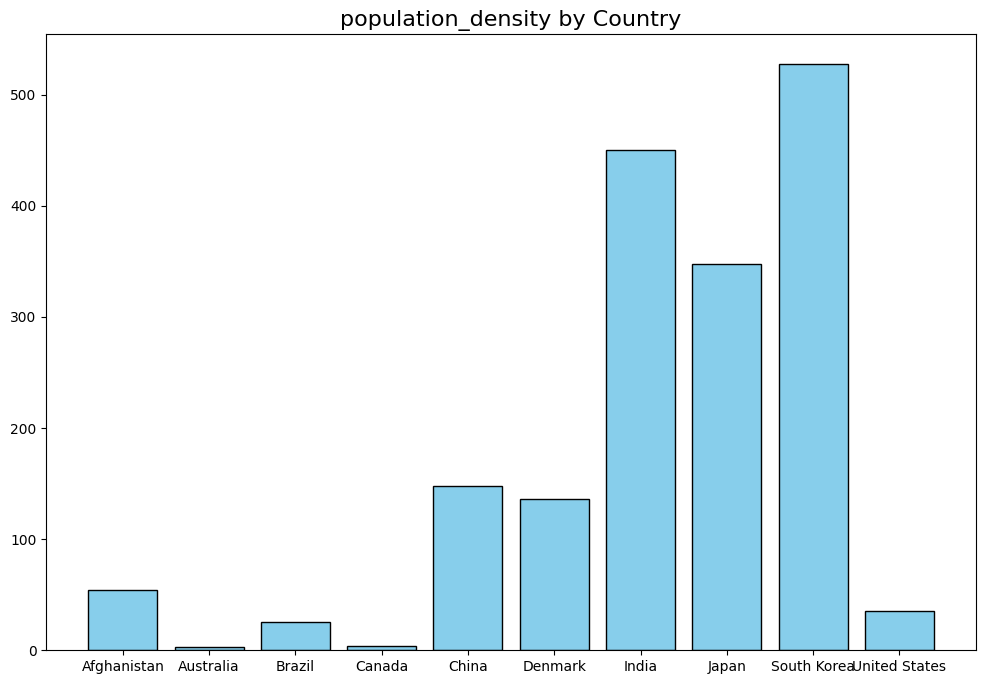

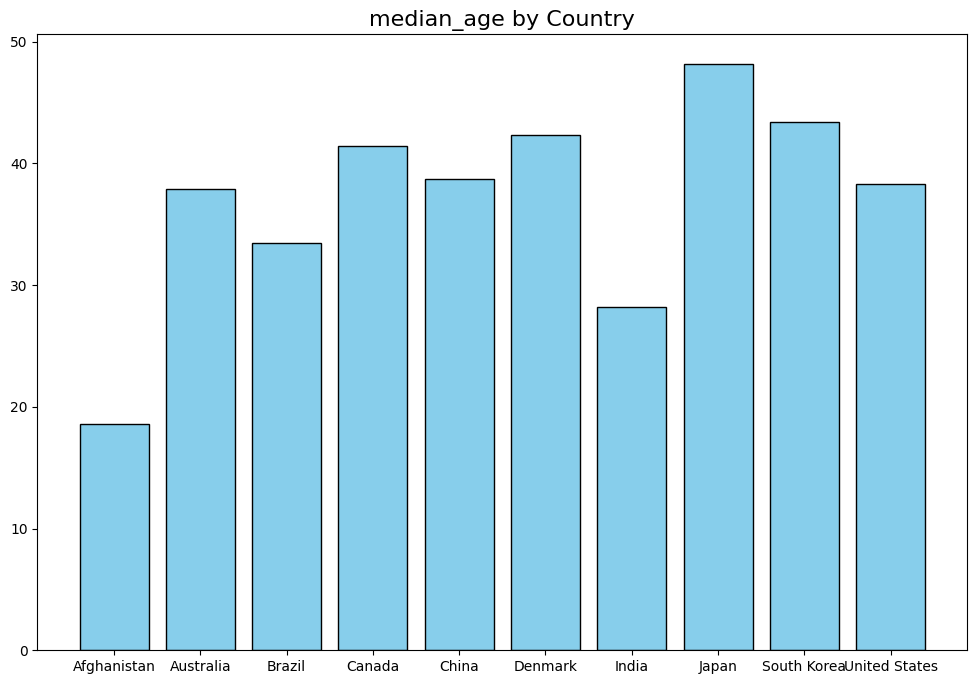

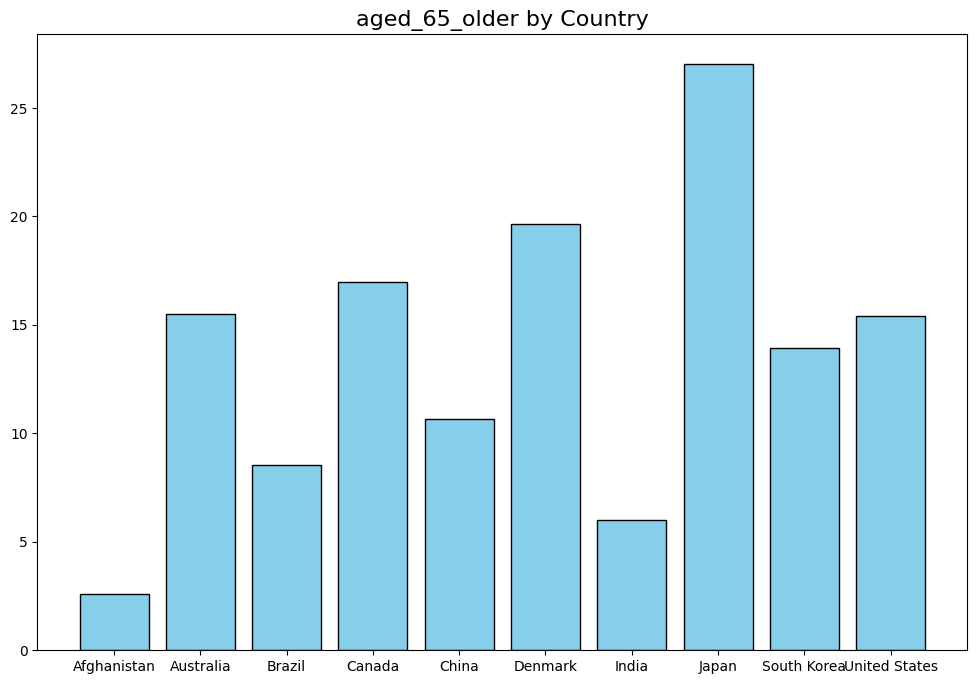

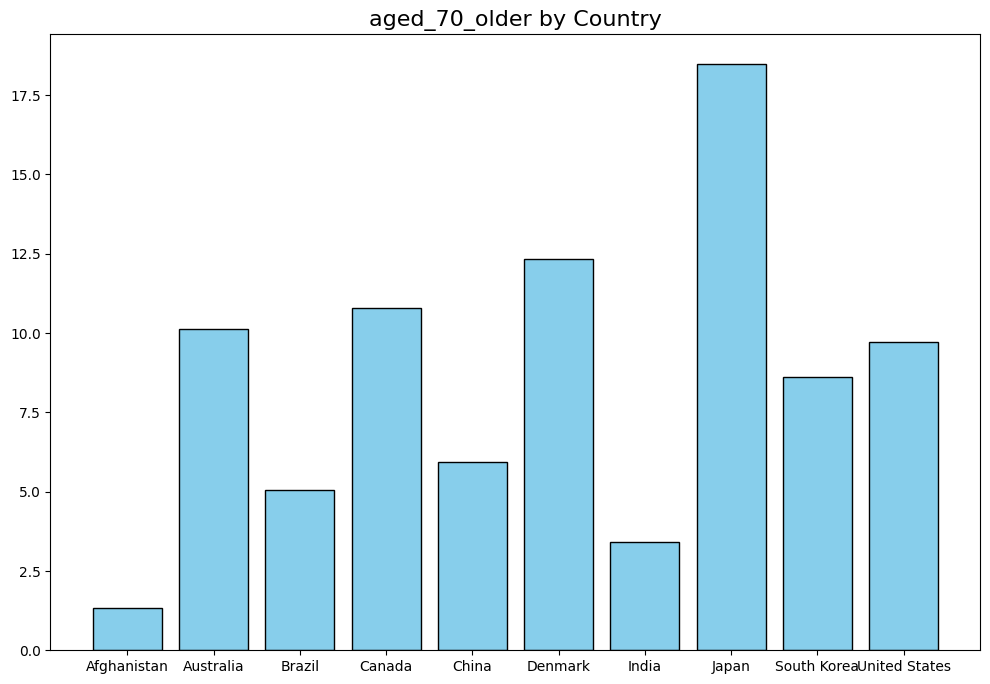

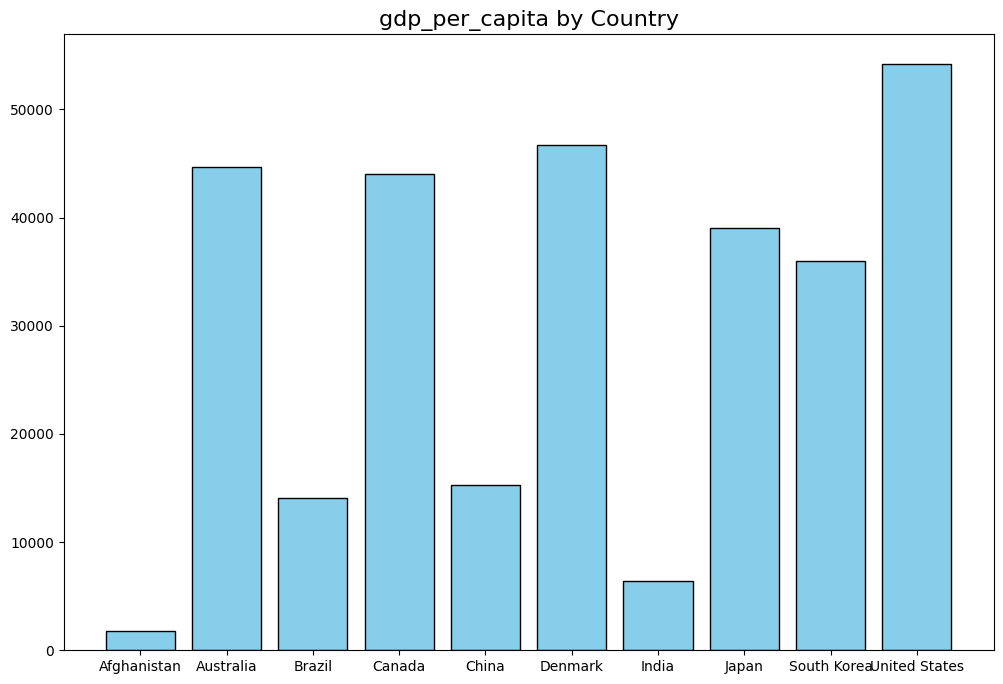

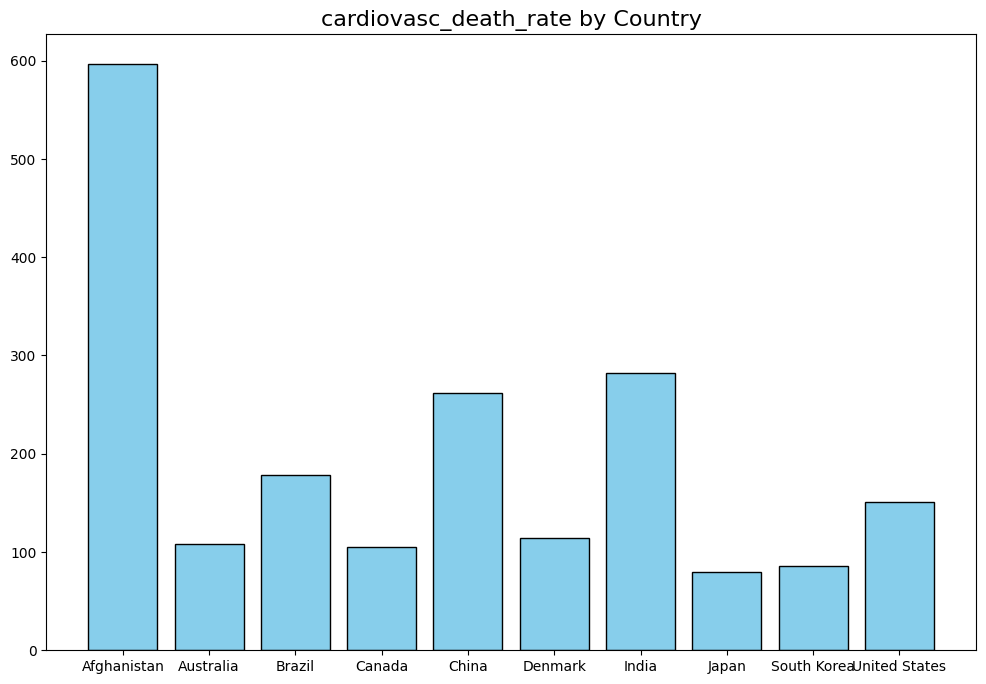

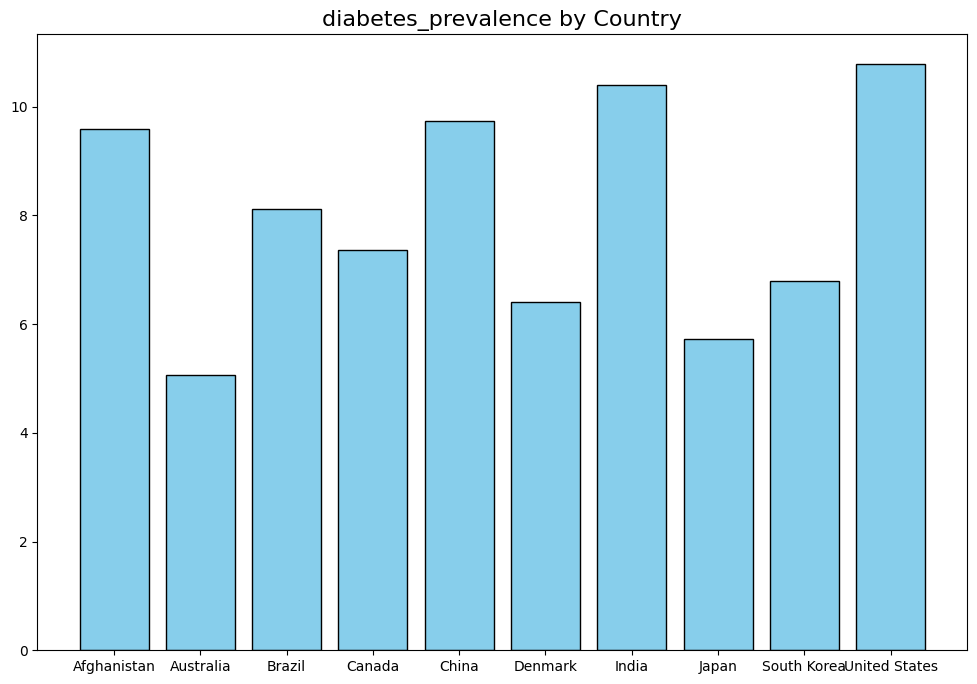

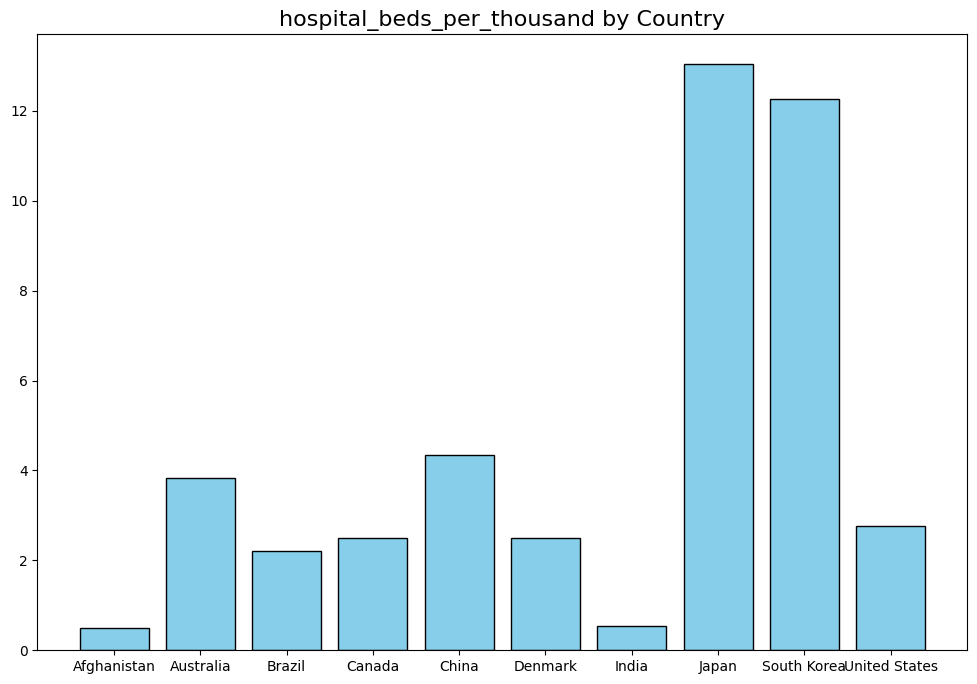

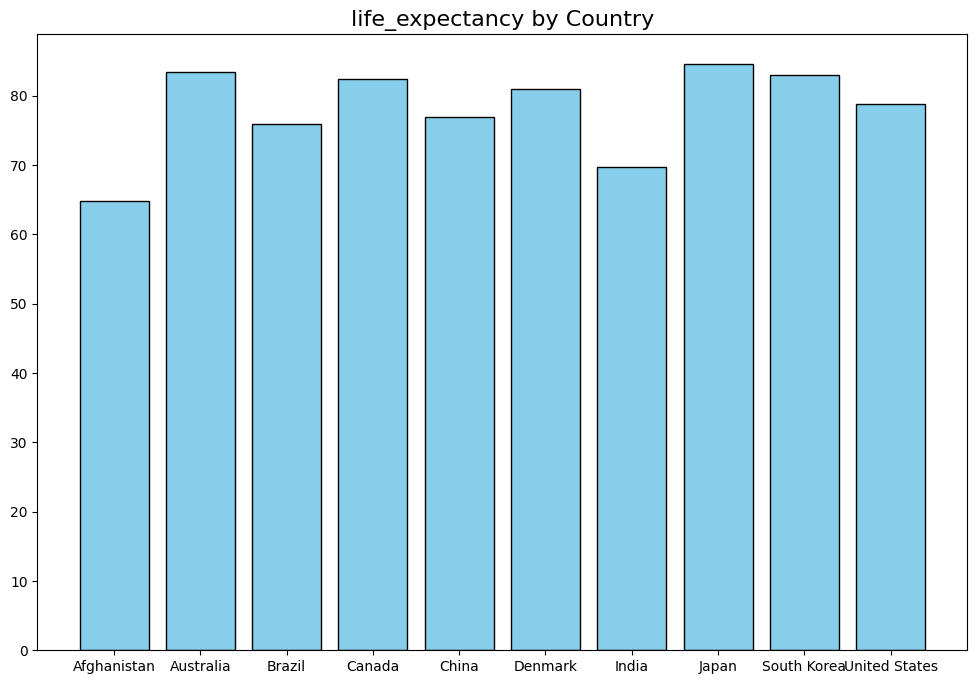

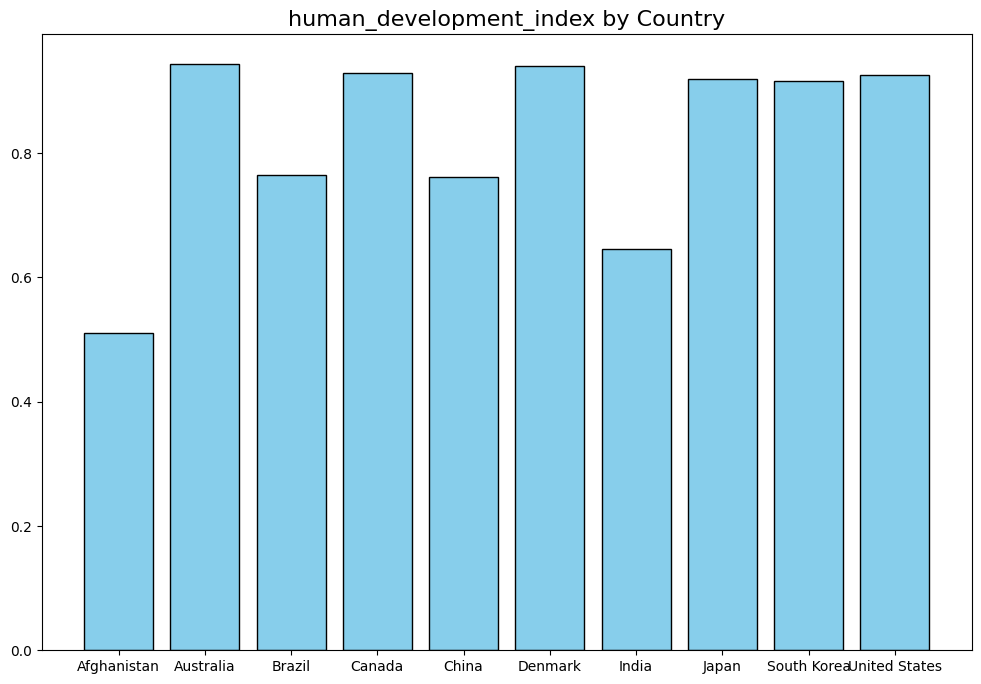

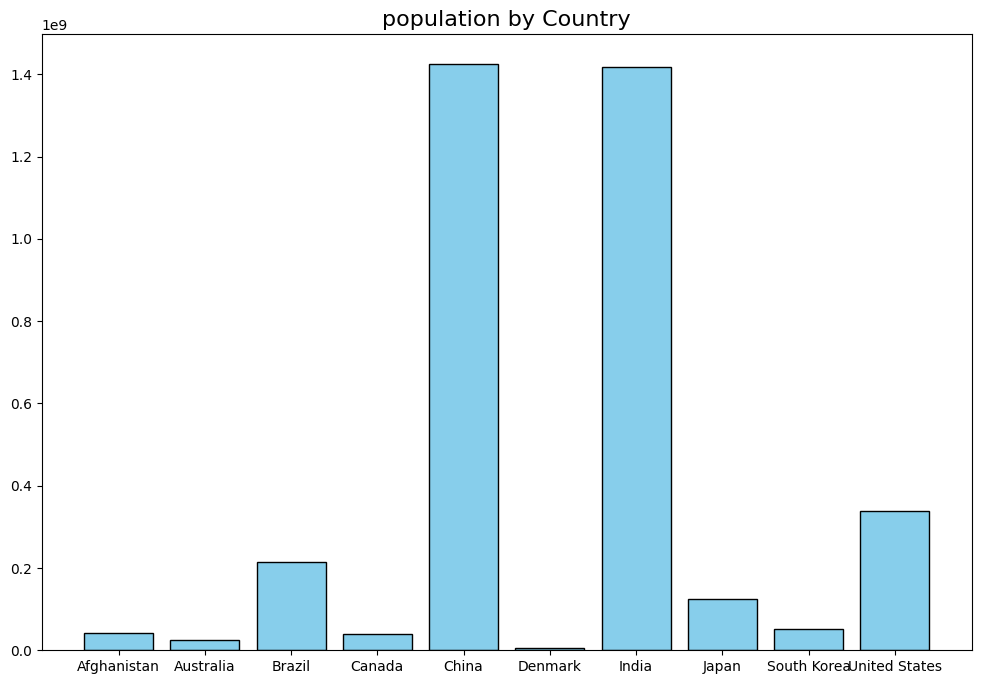

Summary Statistics for Numerical Data
       new_cases_smoothed    new_deaths  total_deaths  new_cases_per_million  \
count        16748.000000  16748.000000  16748.000000           16748.000000   
mean             0.003863      0.003456      0.152468               0.002934   
std              0.026177      0.027282      0.258711               0.027776   
min              0.000000      0.000000      0.000000               0.000000   
25%              0.000007      0.000000      0.004070               0.000000   
50%              0.000111      0.000000      0.020331               0.000000   
75%              0.002241      0.000000      0.121925               0.000000   
max              1.000000      1.000000      1.000000               1.000000   

       positive_rate  new_vaccinations_smoothed  total_deaths_per_million  
count   16748.000000               16748.000000              16748.000000  
mean        0.038789                   0.020194                  0.226209  
std         0

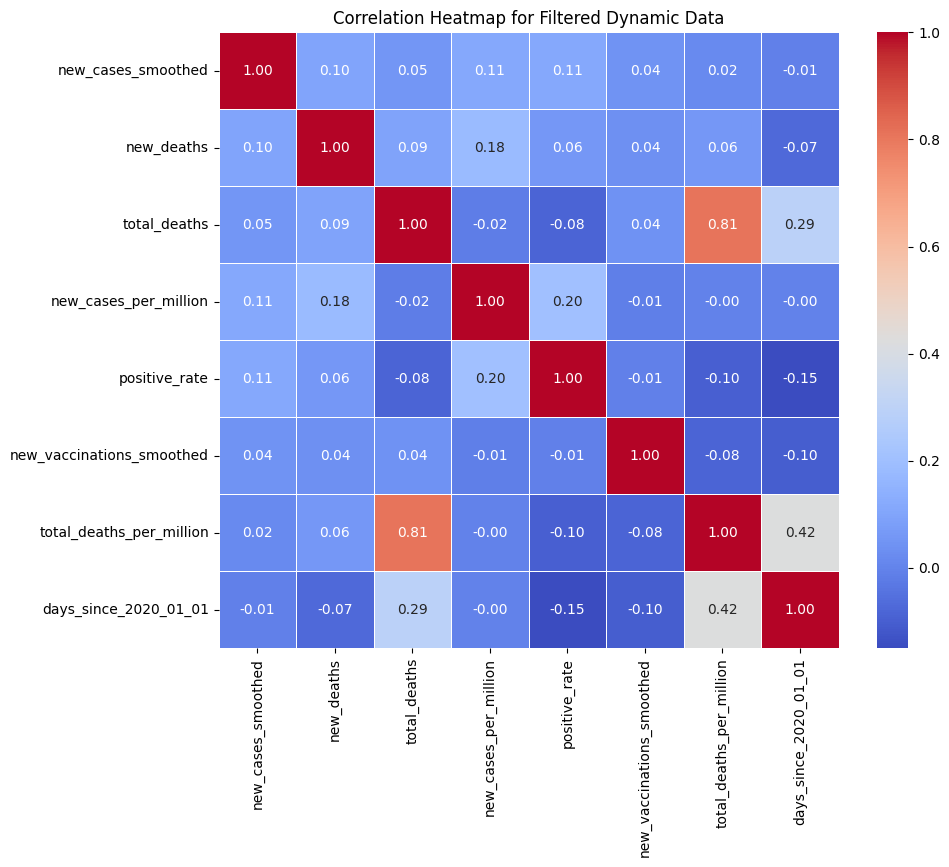

In [5]:
## Descriptive Analytics##
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

unique_static_data = data_cleaning_static.groupby('location')[static_data].first().reset_index()

# Descriptive Analysis for the Static data
# Calculate summary statistics

for column in static_data:
    plt.figure(figsize=(12, 8))
    plt.bar(unique_static_data['location'], unique_static_data[column], color='skyblue', edgecolor='black')
    plt.title(f'{column} by Country', fontsize=16)
    plt.show()


# DESCRIPTIVE ANALYTICS for Dynamic data
numeric_columns_df=filtered_dynamic_data[numeric_columns]

# Summary statistics
print("Summary Statistics for Numerical Data")
print(numeric_columns_df.describe())

# Mode for all numerical
print("\nMode")
print(numeric_columns_df.mode().iloc[0])

# Skewness and Kurtosis
print("\nSkewness table:")
print(numeric_columns_df.skew())
print("\nKurtosis table:")
print(numeric_columns_df.kurtosis())

# Select only numeric columns
numeric_filtered_dynamic = filtered_dynamic_data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_filtered_dynamic.corr()

# Output the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Filtered Dynamic Data')
plt.show()

In [6]:
## Diagnostic Analytics##
# T- TEST for each countries's new case smoothed and new death
import pandas as pd
from scipy.stats import ttest_ind

# Load cleaned dynamic data
cleaned_dynamic_data = pd.read_csv('cleaned_dynamic_data.csv')

# List of countries to test
countries = [
    'China', 'United States', 'Canada', 'Australia', 'Brazil',
    'Afghanistan', 'Japan', 'South Korea', 'Denmark', 'India'
]

def Ttest_cases__deaths(data, group, new_case, new_death):
    # Filter data for the specified country
    country_data = data[data[group] == country]

    # Perform T-test between 'new_cases_smoothed' and 'new_deaths'
    t_stat, p_value = ttest_ind(
        country_data[new_case].dropna(),
        country_data[new_death].dropna(),
        equal_var=False
    )

    return {"country": country, "t_test": t_stat, "p_value": p_value}

# Iterate through countries and perform T-tests for each
results = []
for country in countries:
    result = Ttest_cases__deaths(
        cleaned_dynamic_data,
        group="location",
        new_case="new_cases_smoothed",
        new_death="new_deaths",
    )
    results.append(result)

# Convert the results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the results
print(results_df)


         country     t_test       p_value
0          China   4.308525  1.720357e-05
1  United States  -2.985874  2.861959e-03
2         Canada  -2.931366  3.412896e-03
3      Australia  12.812548  1.464569e-36
4         Brazil  -4.953047  8.021954e-07
5    Afghanistan  -4.237467  2.382806e-05
6          Japan  10.440750  3.929048e-25
7    South Korea  13.486493  9.042398e-40
8        Denmark   7.590114  4.581275e-14
9          India  -1.959157  5.024011e-02


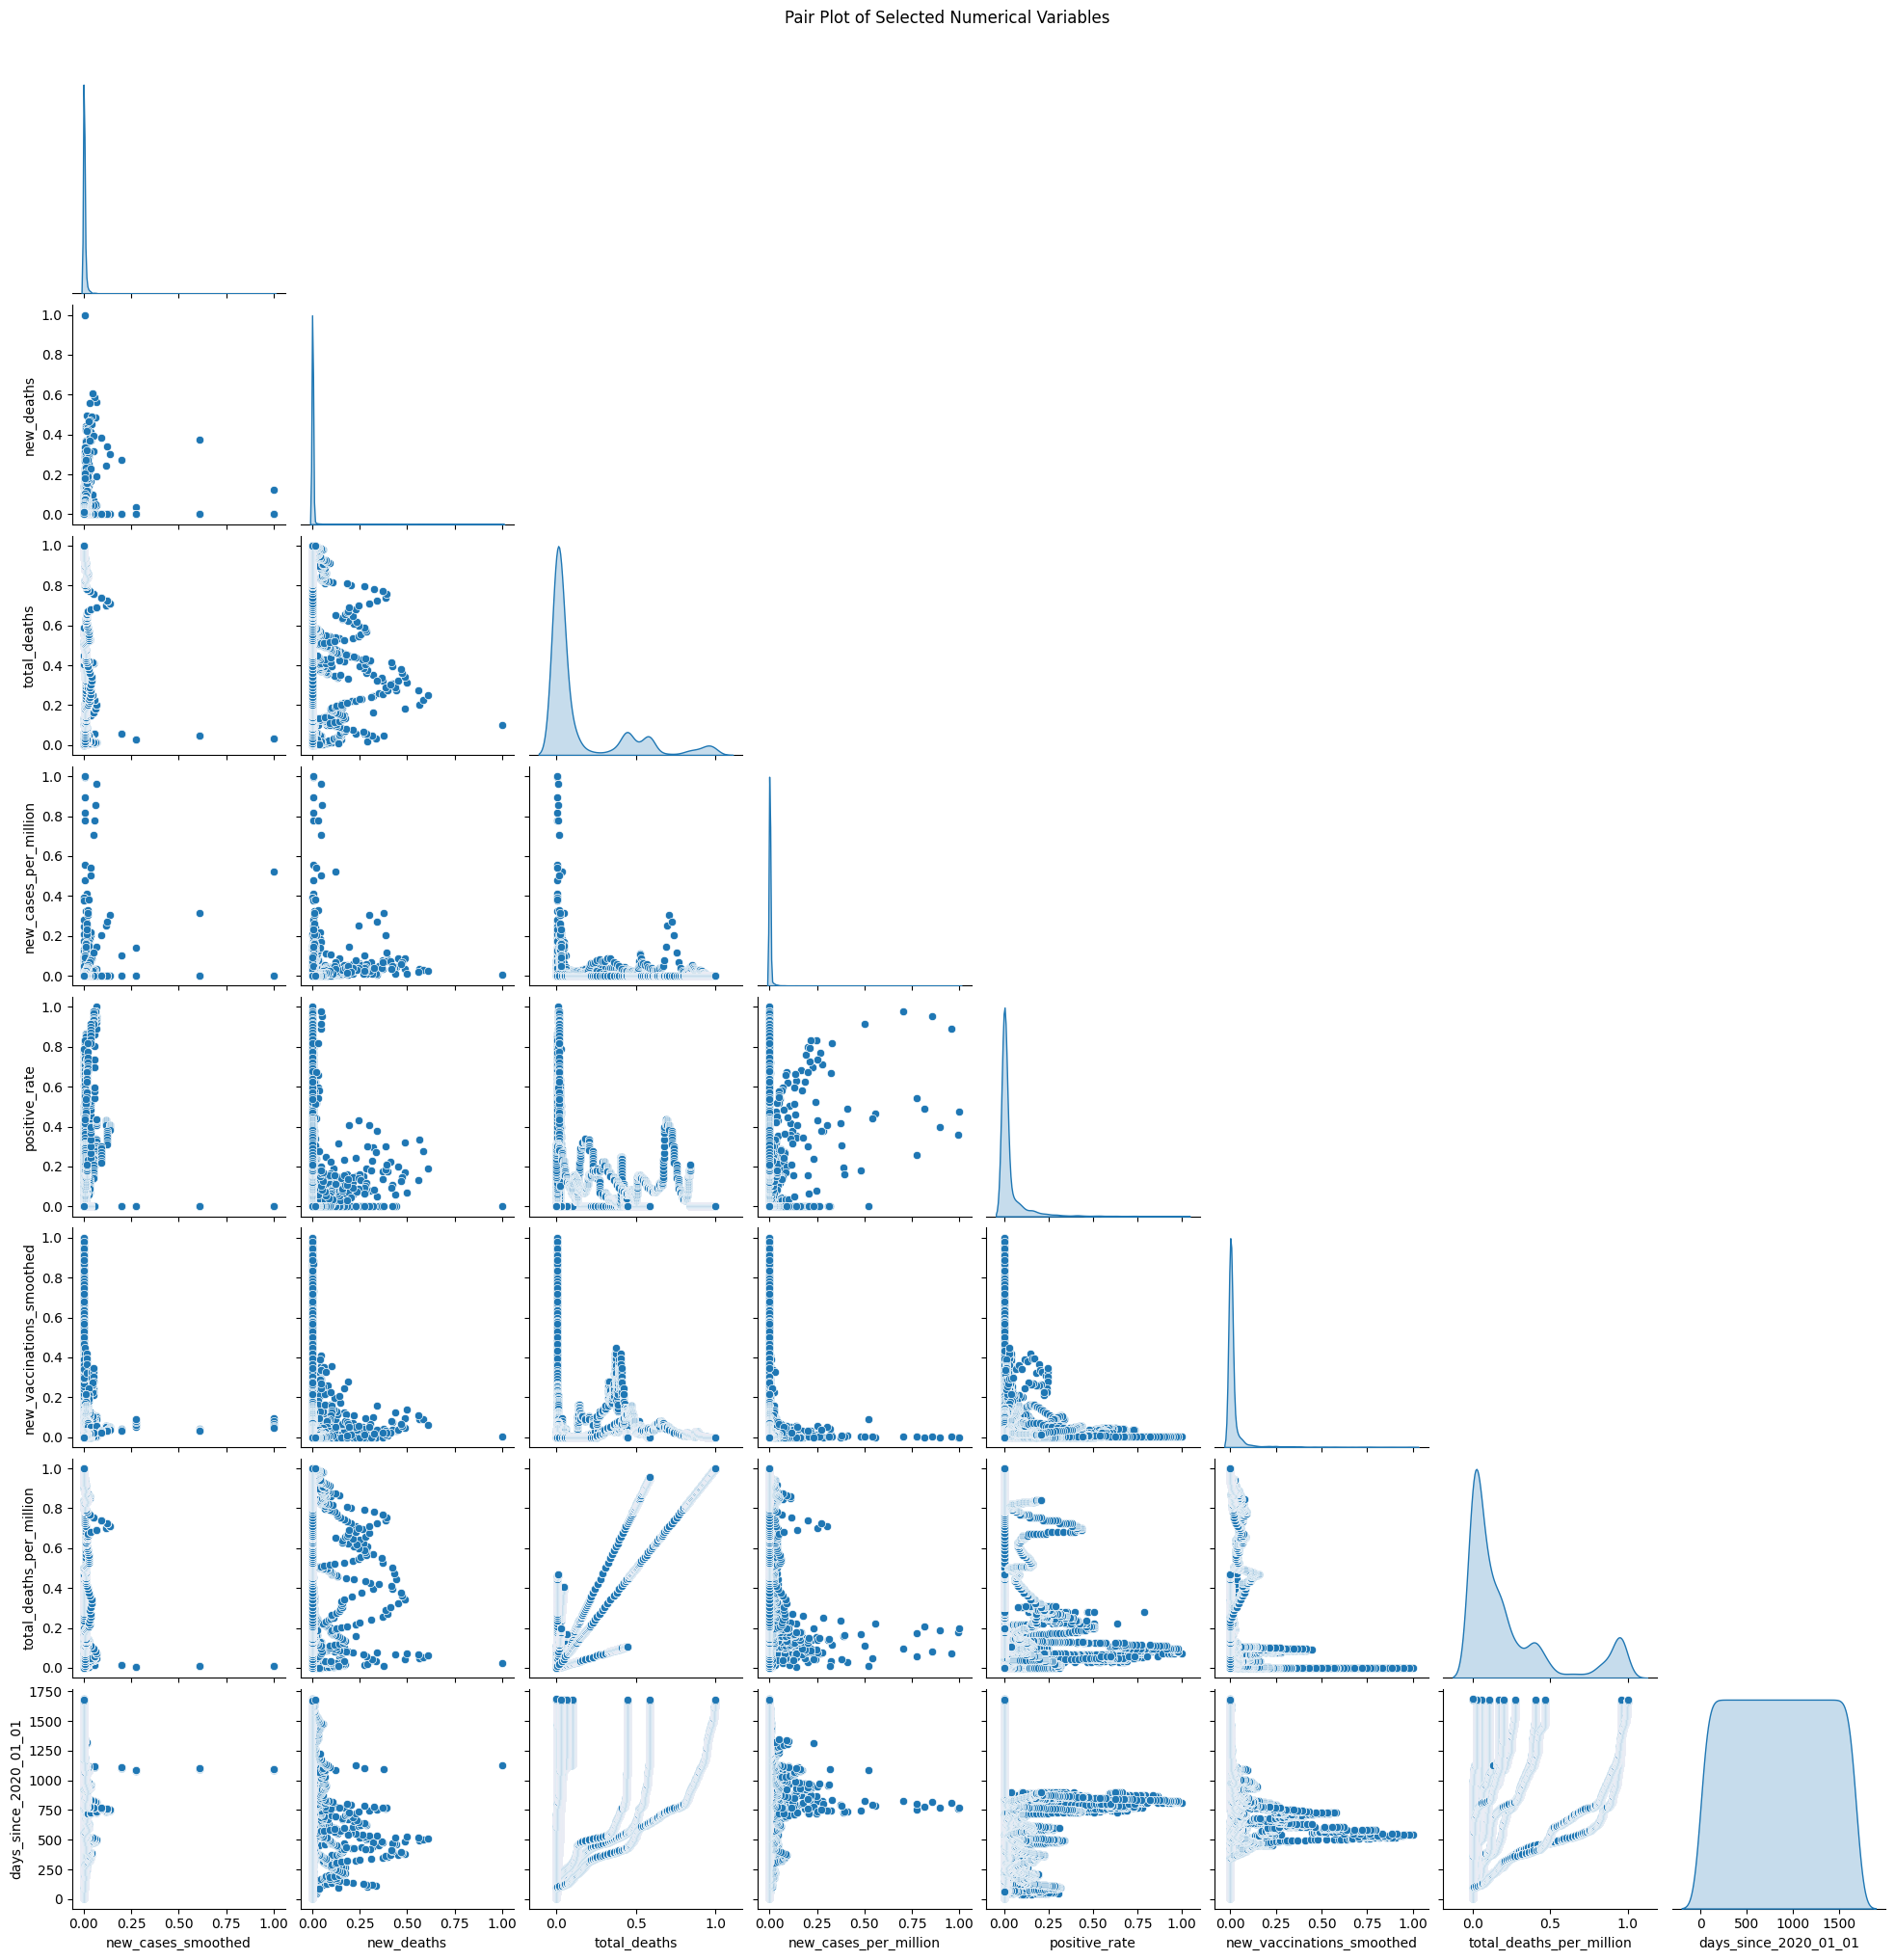

In [7]:
# Data visualization for filtered_dynamic_data
# Pair plot for selected variables
sns.pairplot(numeric_filtered_dynamic, diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Selected Numerical Variables', y=1.02)
plt.show()

       median_age  aged_65_older  aged_70_older       location
0            18.6          2.581          1.337    Afghanistan
1            18.6          2.581          1.337    Afghanistan
2            18.6          2.581          1.337    Afghanistan
3            18.6          2.581          1.337    Afghanistan
4            18.6          2.581          1.337    Afghanistan
...           ...            ...            ...            ...
16743        38.3         15.413          9.732  United States
16744        38.3         15.413          9.732  United States
16745        38.3         15.413          9.732  United States
16746        38.3         15.413          9.732  United States
16747        38.3         15.413          9.732  United States

[16748 rows x 4 columns]


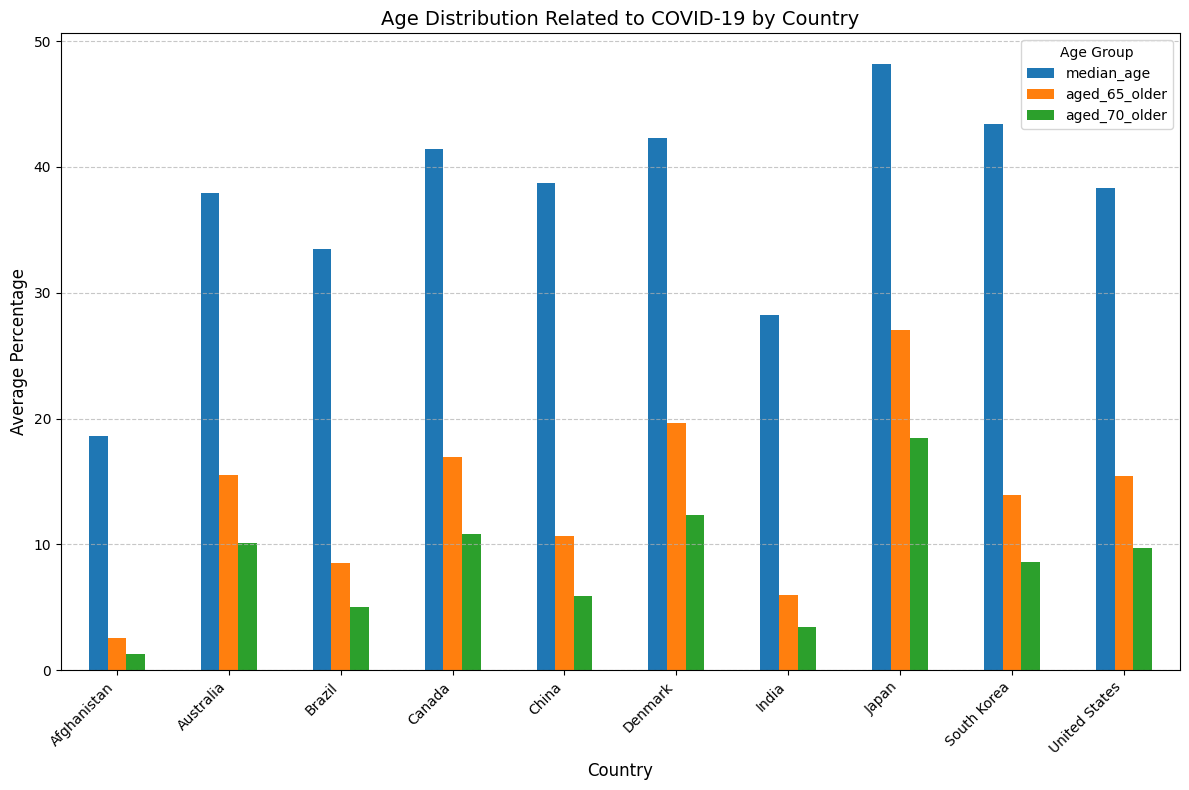

In [8]:
## Descriptive Analytics##
#Segment the data by relevant categories (e.g., by group, region) to identify trends.#
#Use bar chart to show covid-case counts for patients in different age ranges
import pandas as pd
import matplotlib.pyplot as plt

#choose only needed attributes
AgeSelect=['median_age', 'aged_65_older', 'aged_70_older','location']
Age_data= filtered_countries_cleaned
filtered_Age_data = Age_data[AgeSelect].copy()

print(filtered_Age_data)

# Group the data by 'location' and sum the counts for each age range
grouped_df = filtered_Age_data.groupby('location').agg({
    'median_age': 'mean',
    'aged_65_older': 'mean',
    'aged_70_older': 'mean'
}).reset_index()

# Plot the bar chart
grouped_df.set_index('location').plot(kind='bar', figsize=(12, 8))

# Customize the chart
plt.xlabel("Country", fontsize=12)
plt.ylabel("Average Percentage", fontsize=12)
plt.title("Age Distribution Related to COVID-19 by Country", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Age Group")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()


       case_fatality_rate  hospital_beds_per_thousand  diabetes_prevalence  \
1673             3.400308                        0.50                 9.59   
3347             0.212762                        3.84                 5.07   
5021             1.871714                        2.20                 8.11   
6695             1.147154                        2.50                 7.37   
8369             0.123075                        4.34                 9.74   
10043            0.282128                        2.50                 6.41   
11717            1.184730                        0.53                10.39   
13399            0.220965                       13.05                 5.72   
15073            0.103940                       12.27                 6.80   
16747            1.153520                        2.77                10.79   

       cardiovasc_death_rate        date  
1673                 597.029  2024-08-04  
3347                 107.791  2024-08-04  
5021        

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


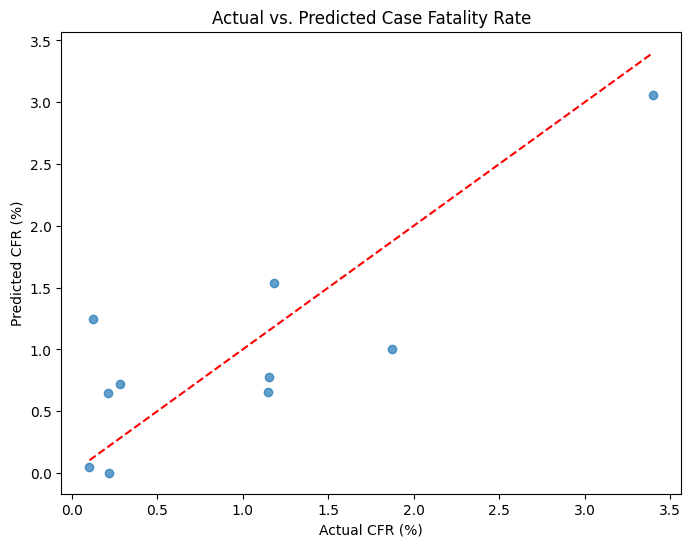

In [9]:
##Diagnostic Analytics##
#Conduct regression analysis to investigate dependencies between variables.#
#Investigate dependencies between'hospital_beds_per_thousand','diabetes_prevalence', 'cardiovasc_death_rate' and 'case_fatality_rate'
import statsmodels.api as sm

#create a new variable，case_fatality_rate
HFdf = filtered_countries_cleaned
HFdf['case_fatality_rate'] = (HFdf['total_deaths'] / HFdf['total_cases']) * 100

#Select variables that might have coefficient with death rate of COVID-19 patients
columns_to_use = [
    'case_fatality_rate', 'hospital_beds_per_thousand' ,
    'diabetes_prevalence', 'cardiovasc_death_rate', 'date'
]


# Drop rows with missing values in relevant columns
HFdf_cleaned = HFdf[columns_to_use].dropna()

# Filter rows where date is "2024/04/04"
HFdf_cleaned = HFdf_cleaned[HFdf_cleaned['date'] == '2024-08-04']
print(HFdf_cleaned)

# create independent variables (X) and dependent variable (y) for future linear regression analysis
X = HFdf_cleaned[['hospital_beds_per_thousand',
                'diabetes_prevalence', 'cardiovasc_death_rate']]
y = HFdf_cleaned['case_fatality_rate']

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)

# Perform Linear Regression
model = sm.OLS(y, X).fit()

# Display regression results
print(model.summary())

# Plot the actual vs. predicted values
HFdf_cleaned['predicted_cfr'] = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(HFdf_cleaned['case_fatality_rate'], HFdf_cleaned['predicted_cfr'], alpha=0.7)
plt.plot([HFdf_cleaned['case_fatality_rate'].min(), HFdf_cleaned['case_fatality_rate'].max()],
         [HFdf_cleaned['case_fatality_rate'].min(), HFdf_cleaned['case_fatality_rate'].max()],
         color='red', linestyle='--')
plt.xlabel('Actual CFR (%)')
plt.ylabel('Predicted CFR (%)')
plt.title('Actual vs. Predicted Case Fatality Rate')
plt.show()



Cross-tabulation Table:
GDP_per_Capita_category  below 2000  2000-7000  10000-15000  15000-20000  \
HDI_category                                                               
below 0.55                     1674          0            0            0   
0.55-0.65                         0       1682            0            0   
0.65-0.8                          0          0         1674         1674   
0.915-0.925                       0          0            0            0   
0.925-0.935                       0          0            0            0   
0.935-0.945                       0          0            0            0   

GDP_per_Capita_category  20000-40000  40000-45000  45000-50000  above 50000  
HDI_category                                                                 
below 0.55                         0            0            0            0  
0.55-0.65                          0            0            0            0  
0.65-0.8                           0            0      

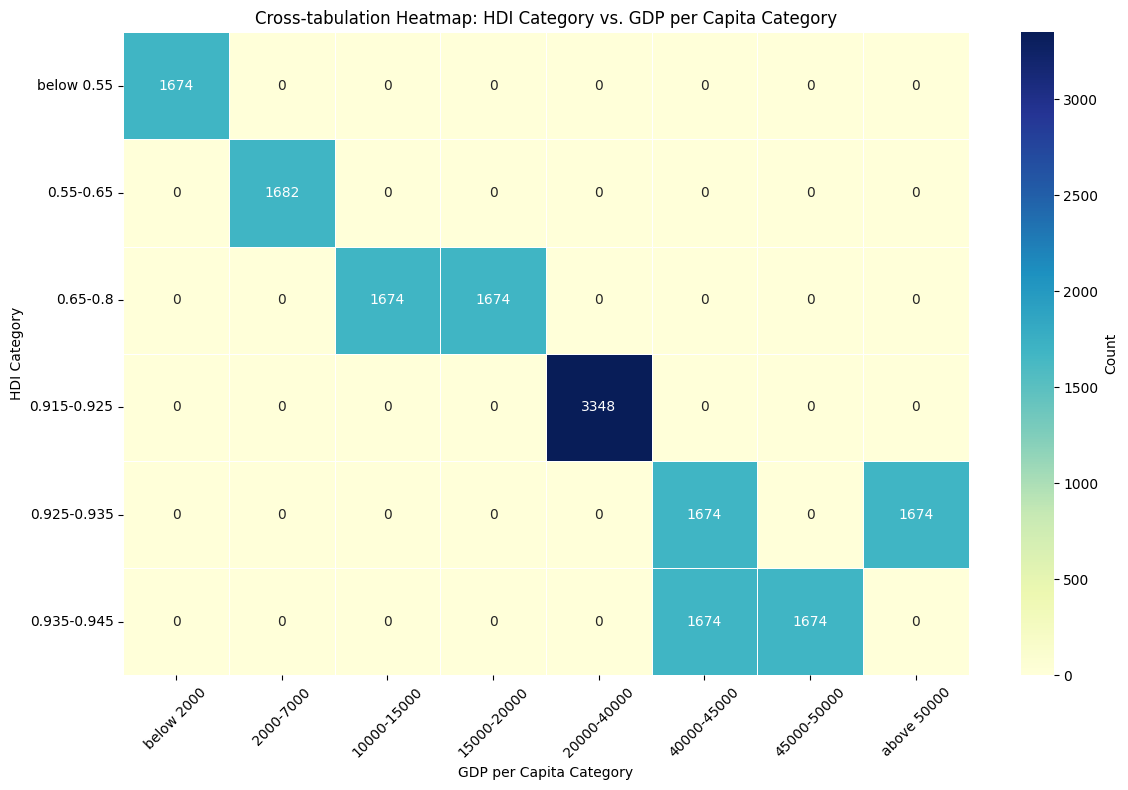

In [10]:
##Diagnostic Analytics##
#Use cross-tabulation to examine relationships between categorical variables.#
#Create cross-tabulation to examine relationships between HDI_category and GDP_per_Capita_category
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cross-tabulation
cross_tab = pd.crosstab(
    cleaned_with_categories['HDI_category'],
    cleaned_with_categories['GDP_per_Capita_category']
)

# Display the cross-tabulation table
print("Cross-tabulation Table:")
print(cross_tab)


# Visualize the cross-tabulation as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    cross_tab,
    annot=True,
    cmap="YlGnBu",
    fmt="d",
    linewidths=0.5,
    cbar_kws={'label': 'Count'}
)
plt.title("Cross-tabulation Heatmap: HDI Category vs. GDP per Capita Category")
plt.xlabel("GDP per Capita Category")
plt.ylabel("HDI Category")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


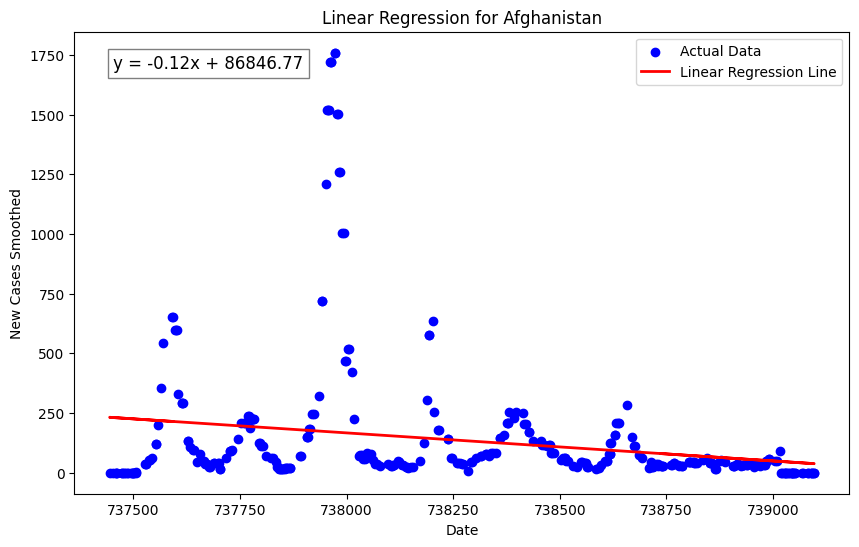

(LinearRegression(), 95341.03178662703, 0.045531345221919484)


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


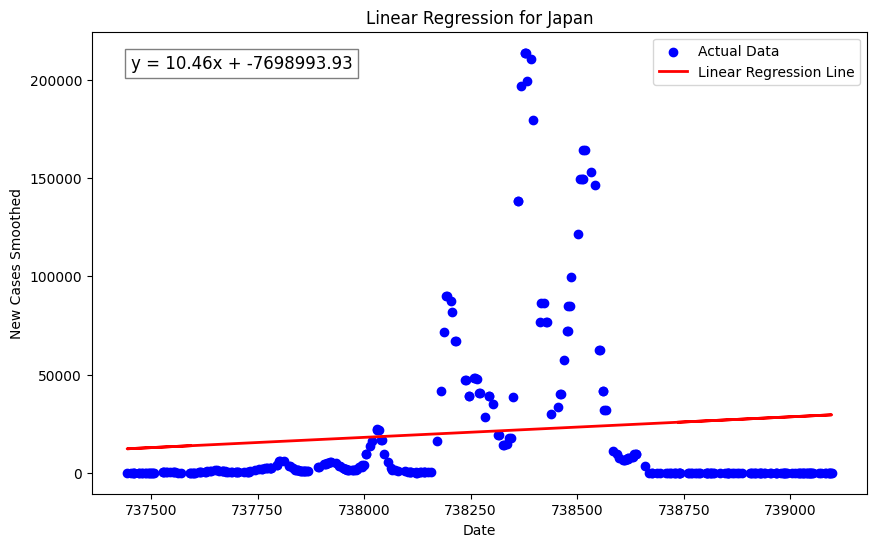

(LinearRegression(), 1700563506.0932305, 0.002073927064369041)


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


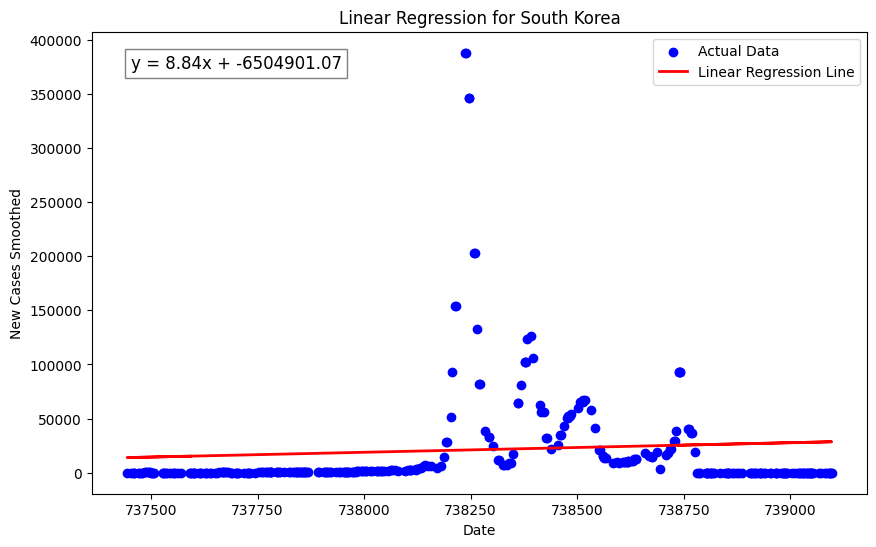

(LinearRegression(), 2403984773.576918, 0.0034035818046251887)


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


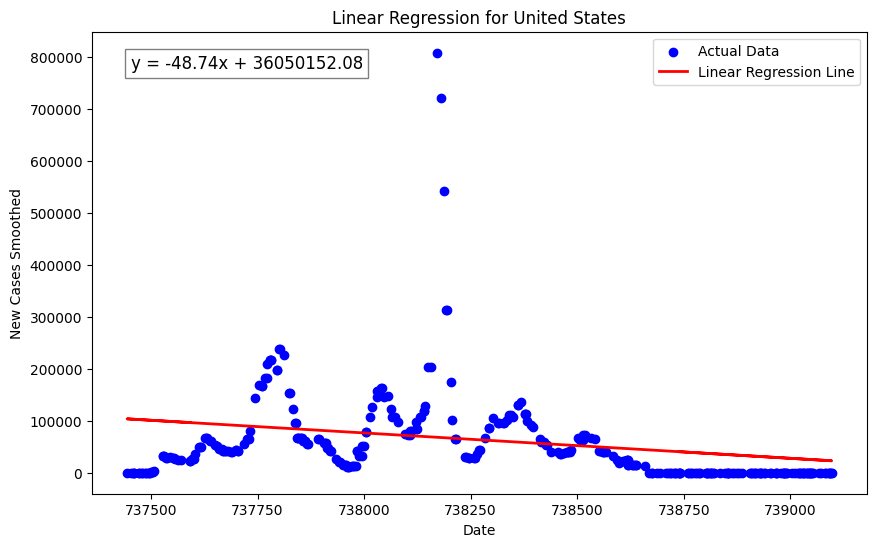

(LinearRegression(), 6651661751.372291, 0.06906694283689851)


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


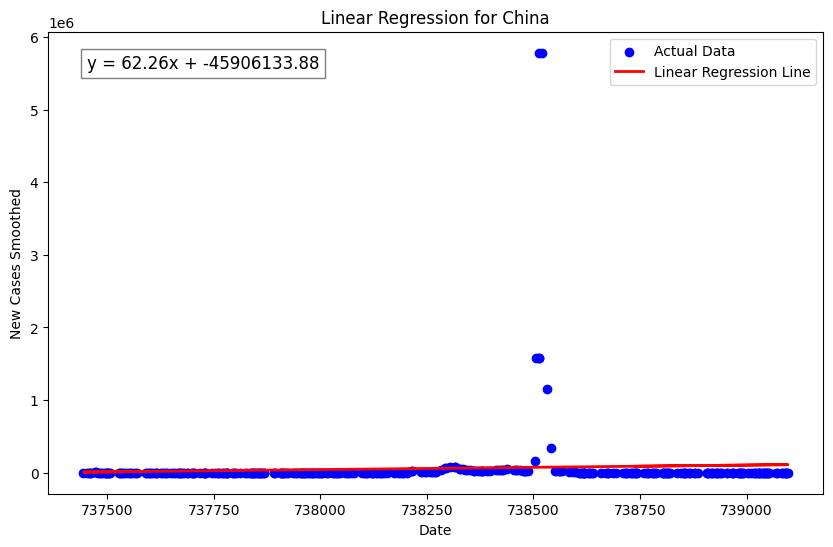

(LinearRegression(), 222495291931.26447, 0.0033285575053235705)


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


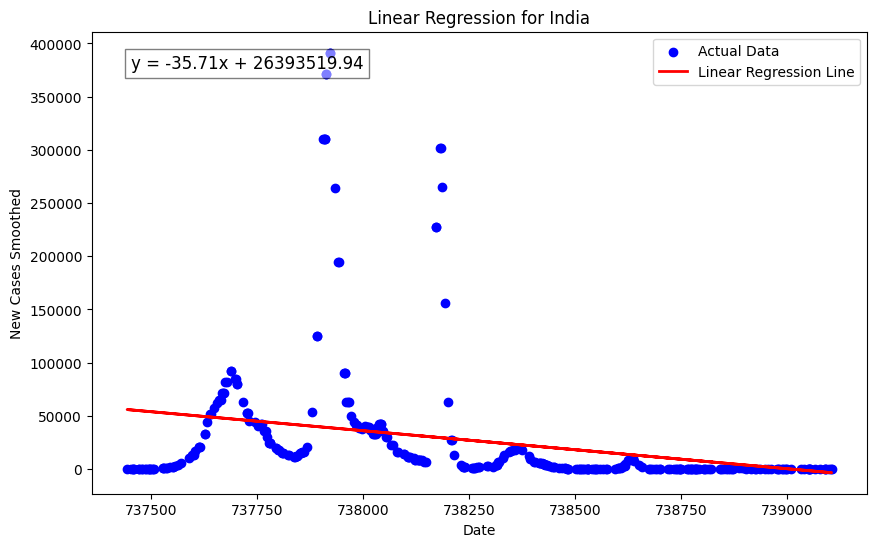

(LinearRegression(), 4002448161.0386686, 0.07500765974534152)


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


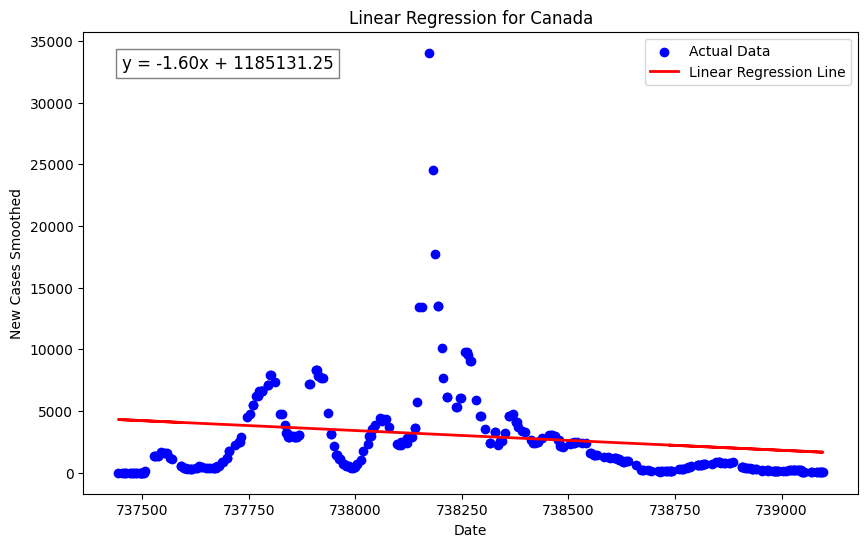

(LinearRegression(), 11740270.830972603, 0.016439755381609467)
Not enough data points for training and testing.


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


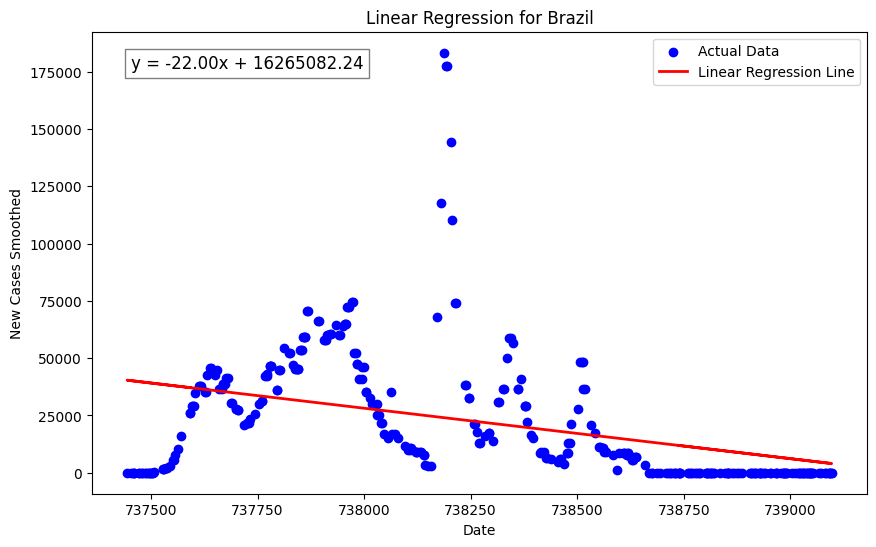

(LinearRegression(), 659447019.5170809, 0.17505328105049345)


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


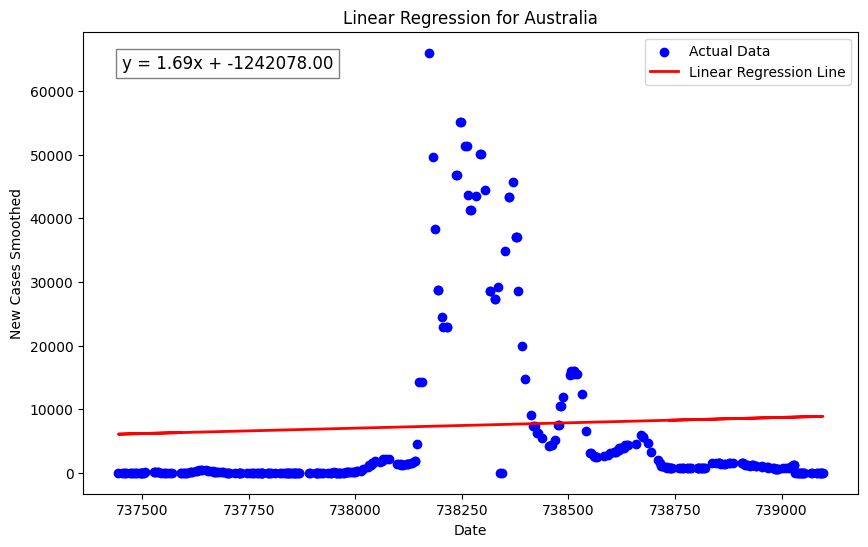

(LinearRegression(), 156780421.70959052, -0.018358208516197516)


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


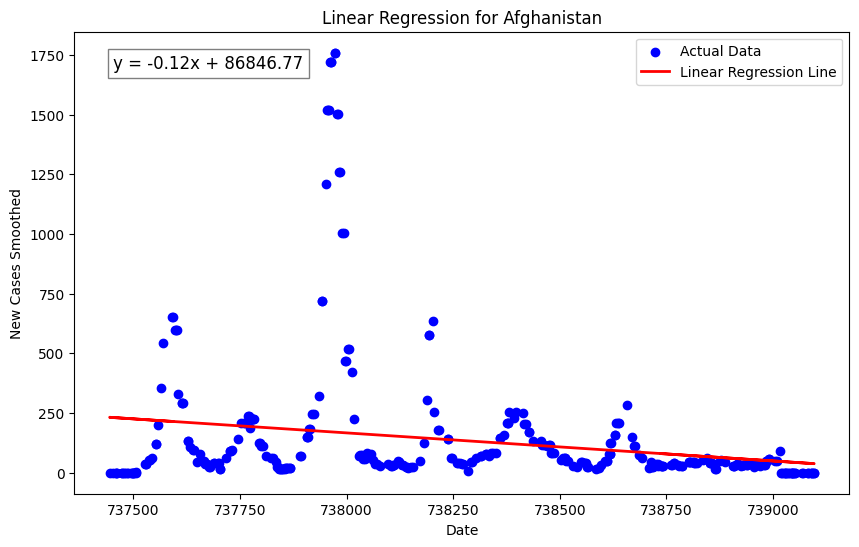

(LinearRegression(), 95341.03178662703, 0.045531345221919484)


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


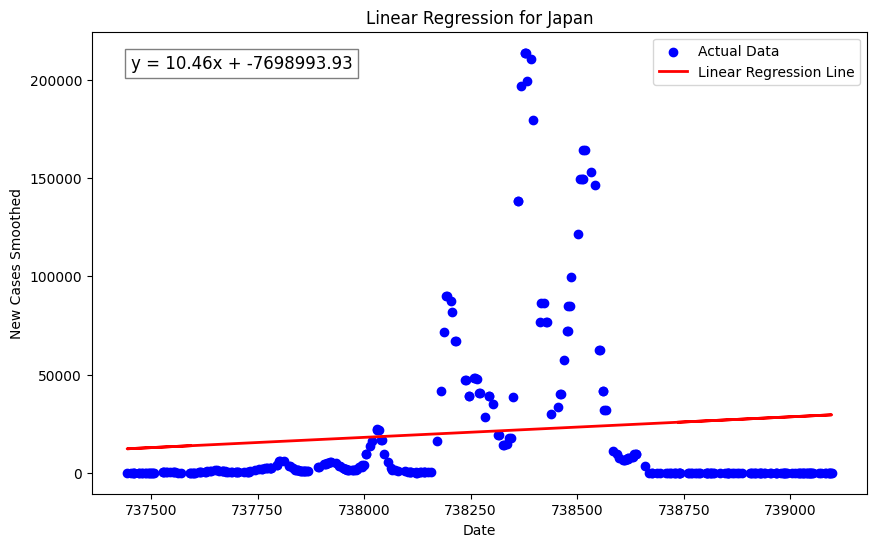

(LinearRegression(), 1700563506.0932305, 0.002073927064369041)


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


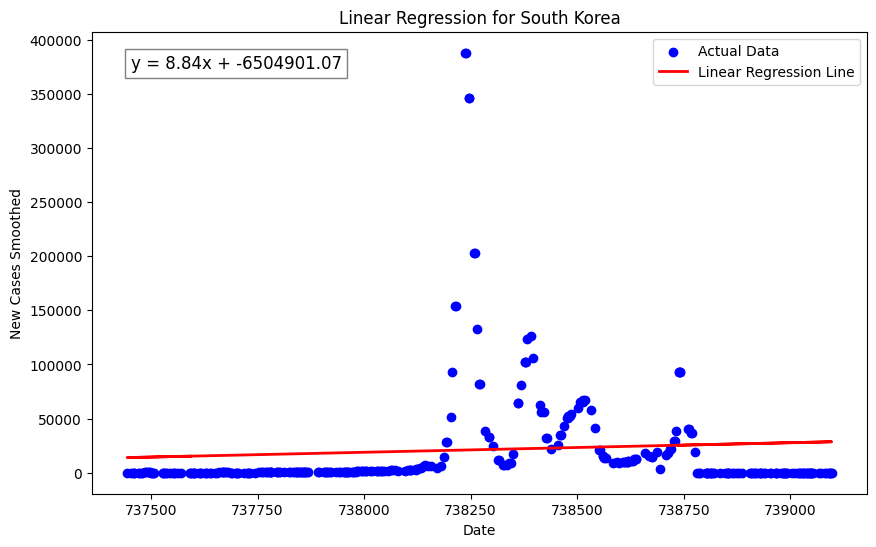

(LinearRegression(), 2403984773.576918, 0.0034035818046251887)


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


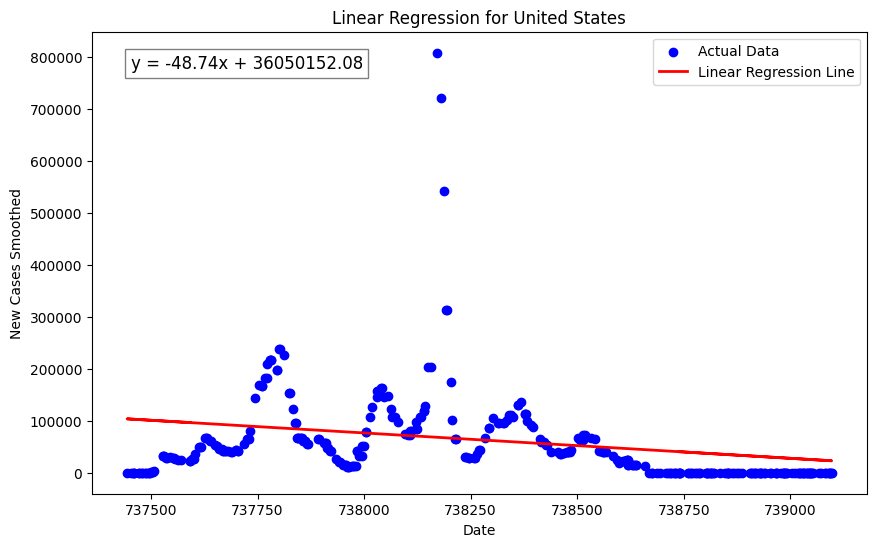

(LinearRegression(), 6651661751.372291, 0.06906694283689851)


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


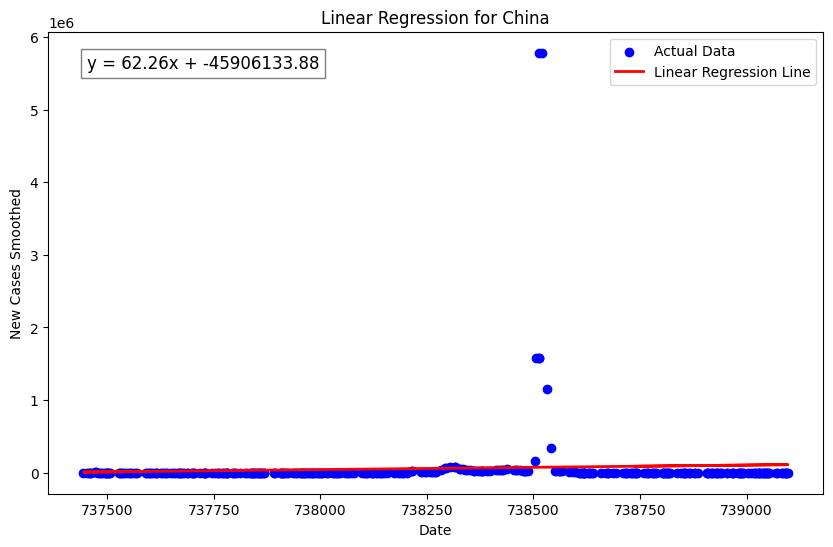

(LinearRegression(), 222495291931.26447, 0.0033285575053235705)


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


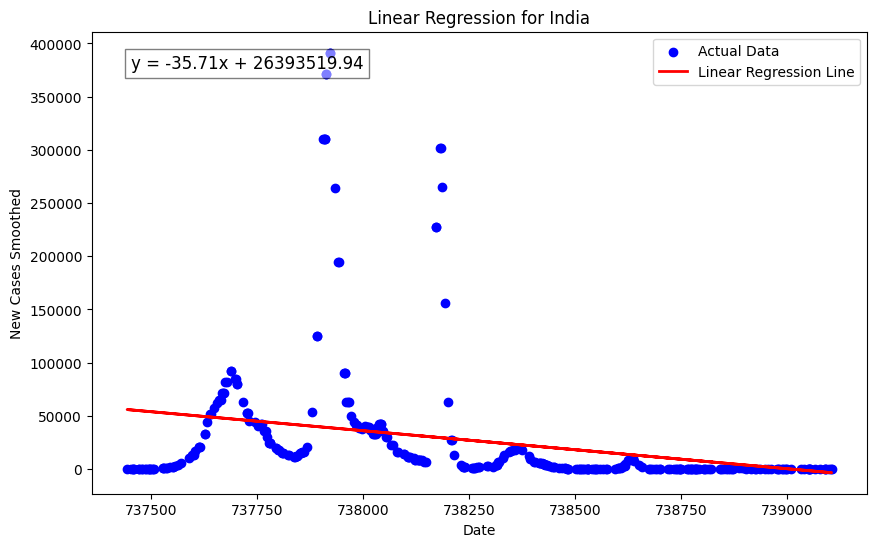

(LinearRegression(), 4002448161.0386686, 0.07500765974534152)


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


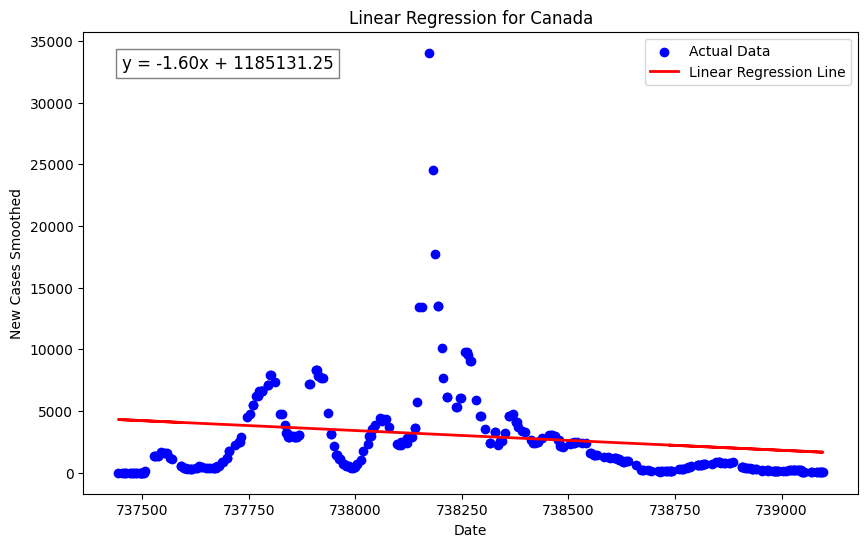

(LinearRegression(), 11740270.830972603, 0.016439755381609467)
Not enough data points for training and testing.


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


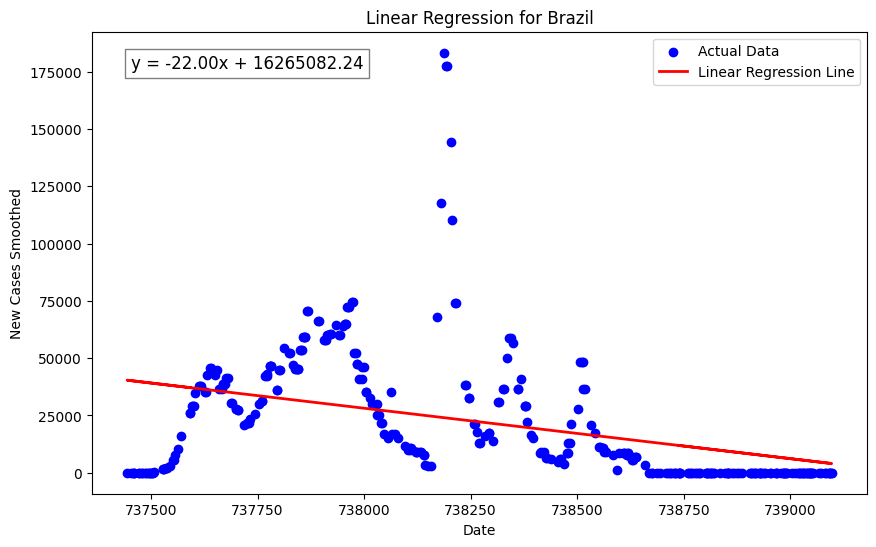

(LinearRegression(), 659447019.5170809, 0.17505328105049345)


<ipython-input-11-a16cfb717022>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
<ipython-input-11-a16cfb717022>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)


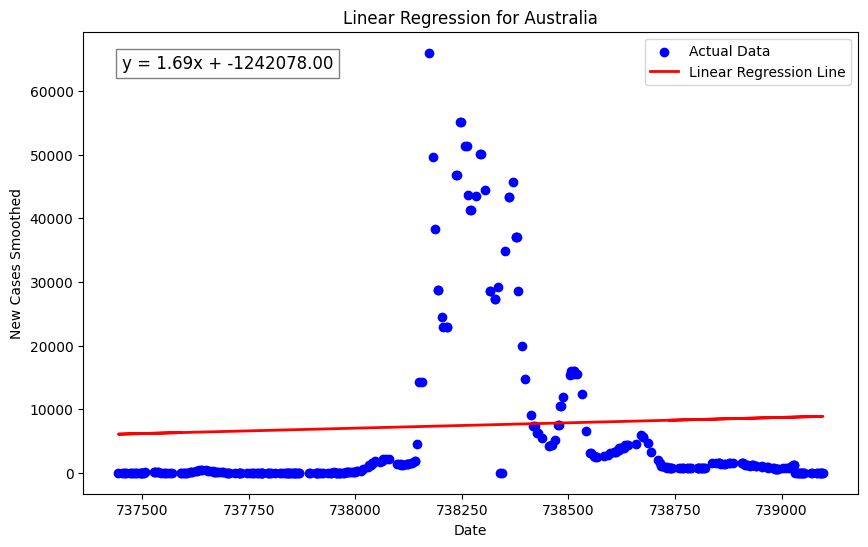

(LinearRegression(), 156780421.70959052, -0.018358208516197516)


In [11]:
##Predict Analytics##

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

##Model##
# predictive analysis for trend of new_cases_smoothed,
# which outputs a scattor plot with attempt on building and training the linear predictive model
# and the accuracy of model in format of (expression type, mean square error, coefficient of determination)
# see more details in report

def new_case_trend(country_name):
    # Filter the data for the specified country
    country_data = filtered_countries_cleaned[filtered_countries_cleaned['location'] == country_name]

    # Ensure there are enough data points for training and testing
    if len(country_data) < 10:
        return "Not enough data points for training and testing."

    # Use 'date' as the feature and 'new_cases_smoothed' as the target variable
    country_data['date'] = pd.to_datetime(country_data['date'])
    country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)

    X = country_data[['date_ordinal']]
    y = country_data['new_cases_smoothed'].fillna(0)  # Fill NaN values with 0

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate the accuracy (mean squared error and R^2 score)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

        # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual Data')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression Line')
    plt.xlabel('Date')
    plt.ylabel('New Cases Smoothed')
    plt.title(f'Linear Regression for {country_name}')
    plt.legend()

    # Display the linear regression equation on the plot
    coef = model.coef_[0]
    intercept = model.intercept_
    equation_text = f'y = {coef:.2f}x + {intercept:.2f}'
    plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

    return model, mse, r2
# calling functions to print the plot and accuracy measures
print(new_case_trend('Afghanistan'))
print(new_case_trend('Japan'))
print(new_case_trend('South Korea'))
print(new_case_trend('United States'))
print(new_case_trend('China'))
print(new_case_trend('India'))
print(new_case_trend('Canada'))
print(new_case_trend('Danmark'))
print(new_case_trend('Brazil'))
print(new_case_trend('Australia'))

##Model 2##
# predictive analysis for trend of total deaths,
# which outputs a scattor plot with attempt on building and training the linear predictive model
# and the accuracy of model in format of (expression type, mean square error, coefficient of determination)
# see more details in report

def total_deaths_trend(country_name):
    # Filter the data for the specified country
    country_data = filtered_countries_cleaned[filtered_countries_cleaned['location'] == country_name]

    # Ensure there are enough data points for training and testing
    if len(country_data) < 10:
        return "Not enough data points for training and testing."

    # Use 'date' as the feature and 'total_deaths_smoothed' as the target variable
    country_data['date'] = pd.to_datetime(country_data['date'])
    country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)

    # Debug print to check the DataFrame
    print("Country Data:")
    print(country_data[['date', 'date_ordinal', 'total_deaths']].head())

    X = country_data[['date_ordinal']]
    y = country_data['total_deaths'].fillna(0)  # Fill NaN values with 0

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate the accuracy (mean squared error and R^2 score)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual Data')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression Line')
    plt.xlabel('Date')
    plt.ylabel('Total Deaths Smoothed')
    plt.title(f'Linear Regression for {country_name} (Total Deaths Smoothed)')
    plt.legend()

    # Display the linear regression equation on the plot
    coef = model.coef_[0]
    intercept = model.intercept_
    equation_text = f'y = {coef:.2f}x + {intercept:.2f}'
    plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

    return model, mse, r2

# calling functions to print the plot and accuracy measures
print(new_case_trend('Afghanistan'))
print(new_case_trend('Japan'))
print(new_case_trend('South Korea'))
print(new_case_trend('United States'))
print(new_case_trend('China'))
print(new_case_trend('India'))
print(new_case_trend('Canada'))
print(new_case_trend('Danmark'))
print(new_case_trend('Brazil'))
print(new_case_trend('Australia'))

Frequency Distribution for HDI Categories:
HDI_category
below 0.55     1674
0.55-0.65      1682
0.65-0.8       3348
0.8-0.915         0
0.915-0.925    3348
0.925-0.935    3348
0.935-0.945    3348
0.945-0.95        0
above 0.95        0
Name: count, dtype: int64

Frequency Distribution for GDP Per Capita Categories:
GDP_per_Capita_category
below 2000     1674
2000-7000      1682
7000-10000        0
10000-15000    1674
15000-20000    1674
20000-40000    3348
40000-45000    3348
45000-50000    1674
above 50000    1674
Name: count, dtype: int64


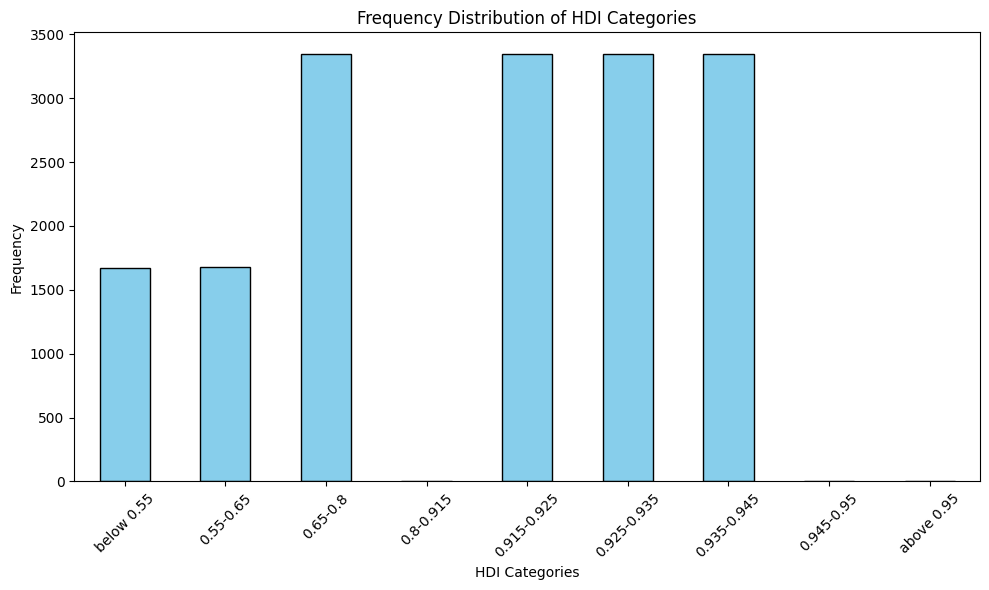

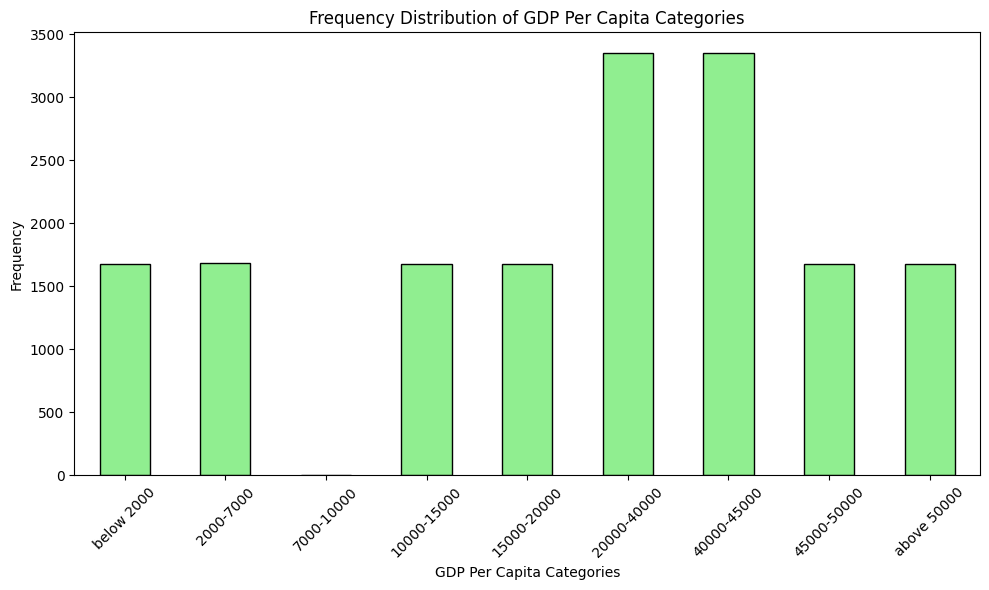

In [12]:
##Descriptive Analytics##
#Generate frequency distributions for categorical data.#
#distributions for HDI categories and GDP_per_Capita_category#

# Frequency distribution for HDI categories
hdi_frequency = cleaned_with_categories['HDI_category'].value_counts().sort_index()
print("Frequency Distribution for HDI Categories:")
print(hdi_frequency)

# Frequency distribution for GDP per Capita categories
gdp_frequency = cleaned_with_categories['GDP_per_Capita_category'].value_counts().sort_index()
print("\nFrequency Distribution for GDP Per Capita Categories:")
print(gdp_frequency)

# Plot bar chart for HDI categories
hdi_frequency.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of HDI Categories')
plt.xlabel('HDI Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plot bar chart for GDP per Capita categories
gdp_frequency.plot(kind='bar', figsize=(10, 6), color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution of GDP Per Capita Categories')
plt.xlabel('GDP Per Capita Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
##Predictive Analysis##
#build model to predict death rate(total death/total case)#

##Model 3 Data Prepare##
#Data prepare, make a new dataframe with all countries to ensure enough data
all_country = covid_df

# Sort the completeness
column_complete = all_country.notnull().mean() * 100
sorted_complete = column_complete.sort_values(ascending=False)

# Drop columns with less than 60% completeness
column_drop = column_complete[(column_complete < 60)].index
all_country_cleaned = all_country.drop(columns=column_drop)

# Sort the completeness
Acolumn_complete = all_country_cleaned.notnull().mean() * 100

Asorted_complete = Acolumn_complete.sort_values(ascending=False)

Acolumn_drop = Acolumn_complete[(Acolumn_complete < 60)].index
all_country_cleaned = all_country.drop(columns=Acolumn_drop)

print(f"Dropped columns: {list(Acolumn_drop)}")

print(all_country_cleaned)

#choose variables
Model_1_columns_to_use = ['human_development_index','hospital_beds_per_thousand','gdp_per_capita','life_expectancy','total_deaths', 'total_cases', 'date']

Model_1_df_cleaned=all_country_cleaned[Model_1_columns_to_use].dropna()
# Filter rows where date is "2024/04/04"
Model_1_df_cleaned = Model_1_df_cleaned[Model_1_df_cleaned['date'] == '2024-08-04']

#create a new variable COVID_death_rate
Model_1_df_cleaned['COVID_death_rate'] = (Model_1_df_cleaned['total_deaths'] / Model_1_df_cleaned['total_cases']) * 100
Model_1_df_cleaned=Model_1_df_cleaned.dropna()
print(Model_1_df_cleaned)

Dropped columns: []
       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  total_deaths  n

[ 3.4003078   1.07596845  2.52848728  1.60333846  1.29353708  1.94064205
  0.21276163  0.37047608  1.2387572   2.16985713  0.22049514  1.43803002
  0.54613103  0.71606992  0.70470357  0.96339653  0.58139535  0.03349443
  1.84688821  4.06078292  0.84700148  1.87171433  0.05147776  2.90980069
  1.80676634  0.02748813  2.19352709  1.57609824  1.14715437  0.64677234
  0.73181789  1.16142449  0.12307541  2.23294382  1.75650456  0.75905017
  1.4236864   0.20835427  0.91368627  0.28212764  1.20458891  0.46114539
  0.66313419  0.58823529  3.34587844  4.81180102  2.09488906  1.06830123
  1.0108941   0.49109622  1.89367801  1.51119429  1.28173563  0.76454679
  0.4310303   0.62587919  2.94606795  0.92025445  0.45522689  0.84969372
  0.69193175  1.20855126  1.61576044  1.21331536  1.74898916  2.49593685
  2.35019962  2.19889726  0.08841397  1.18472978  2.37296137  1.92500835
  1.02918422  0.55836726  0.26245684  0.73674032  2.29735146  0.22096481
  0.80835857  1.26777322  1.65326963  0.4719764   0

<ipython-input-14-dde0842a6930>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Model_1_df_cleaned['COVID_death_rate'], shade=True)


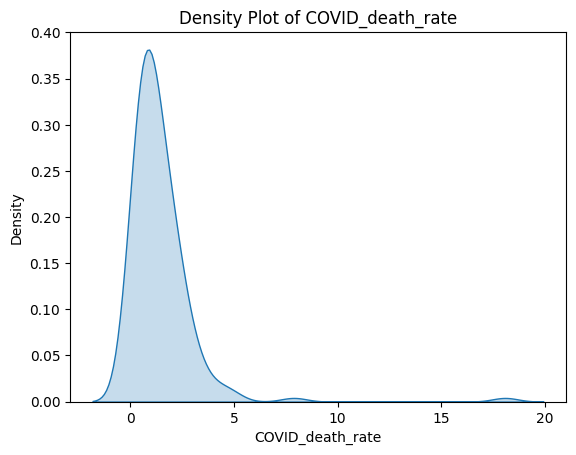

Medians for each variable:
human_development_index            0.759000
hospital_beds_per_thousand         2.360000
gdp_per_capita                 13480.721000
life_expectancy                   74.575000
total_deaths                    6659.000000
total_cases                   640202.500000
COVID_death_rate                   1.072135
dtype: float64

Binary DataFrame:
        human_development_index  hospital_beds_per_thousand  gdp_per_capita  \
1673                          0                           0               0   
5021                          1                           1               0   
6695                          0                           0               1   
15065                         1                           1               1   
16743                         1                           1               1   
...                         ...                         ...             ...   
419855                        0                           1               0   

In [14]:
##Predictive Analysis##
#build model to predict death rate(total death/total case)#

##Model 3 Data Prepare##

#find unique values in COVID_death_rate
unique_values_DR = Model_1_df_cleaned['COVID_death_rate'].unique()
print(unique_values_DR)
#find the median and median of COVID_death_rate
median_value_DR = Model_1_df_cleaned['COVID_death_rate'].median()
mean_value_DR = Model_1_df_cleaned['COVID_death_rate'].mean()
print(median_value_DR)
print(mean_value_DR)

#Mean and median have big different, view distribution.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Draw the KDE plot (line chart distribution)
sns.kdeplot(Model_1_df_cleaned['COVID_death_rate'], shade=True)

# Customize the plot
plt.xlabel('COVID_death_rate')
plt.ylabel('Density')
plt.title('Density Plot of COVID_death_rate')

# Show the plot
plt.show()

#find medians for other selected variables
medians = Model_1_df_cleaned.drop(columns='date').median()
print("Medians for each variable:")
print(medians)

#convert these variables to binary variables (">median" is "1", "<median" is "0")
#drop "date"
Model_1_df_cleaned= Model_1_df_cleaned.drop(columns='date')
binary_Model1df = Model_1_df_cleaned.apply(lambda x: (x > x.median()).astype(int))
print("\nBinary DataFrame:")
print(binary_Model1df)



Intercept: [1.17252606]
Coefficients: [[ 0.21268146 -0.85456482 -1.0104698  -0.54903767]]
Confusion Matrix:
[[17  9]
 [ 9 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        26
           1       0.62      0.62      0.62        24

    accuracy                           0.64        50
   macro avg       0.64      0.64      0.64        50
weighted avg       0.64      0.64      0.64        50



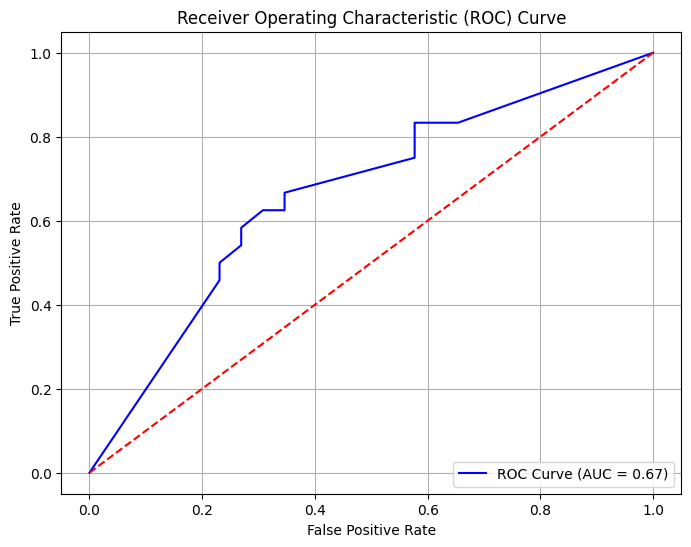

Cutoff and Profit Analysis
Cutoff: 0.05, Profit/Loss: 1100.00
Cutoff: 0.10, Profit/Loss: 1100.00
Cutoff: 0.15, Profit/Loss: 1100.00
Cutoff: 0.20, Profit/Loss: 1100.00
Cutoff: 0.25, Profit/Loss: 1100.00
Cutoff: 0.30, Profit/Loss: 1150.00
Cutoff: 0.35, Profit/Loss: 1250.00
Cutoff: 0.40, Profit/Loss: 1150.00
Cutoff: 0.45, Profit/Loss: 1050.00
Cutoff: 0.50, Profit/Loss: 1050.00
Cutoff: 0.55, Profit/Loss: 1100.00
Cutoff: 0.60, Profit/Loss: 1050.00
Cutoff: 0.65, Profit/Loss: 950.00
Cutoff: 0.70, Profit/Loss: 800.00
Cutoff: 0.75, Profit/Loss: 800.00
Cutoff: 0.80, Profit/Loss: 0.00
Cutoff: 0.85, Profit/Loss: 0.00
Cutoff: 0.90, Profit/Loss: 0.00
Cutoff: 0.95, Profit/Loss: 0.00


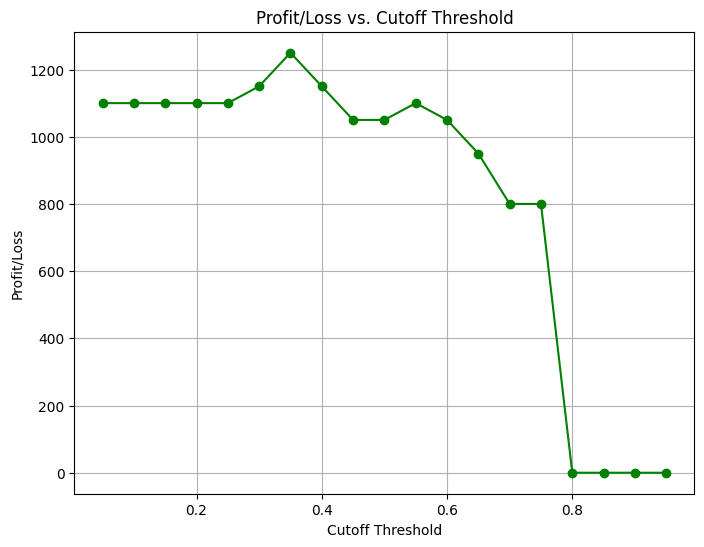

In [15]:
##Predictive Analysis##
#build model to predict death rate(total death/total case)#

##Model 3##
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# predictors selection
X = binary_Model1df[['human_development_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'life_expectancy']]
y = binary_Model1df['COVID_death_rate']


##Fitting the Model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

## Predicting with the Model
# Initialize and fit the logistic regression model
logisticRegression = LogisticRegression(max_iter=1000)
logisticRegression.fit(X_train, y_train)

# Model coefficients and intercept
print("Intercept:", logisticRegression.intercept_)
print("Coefficients:", logisticRegression.coef_)

# Predict probabilities and binary outcomes on the test set
y_test_proba = logisticRegression.predict_proba(X_test)[:, 1]
y_test_pred = logisticRegression.predict(X_test)


##Reviewing Model Accuracy
# Evaluate the model: confusion matrix and classification report
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

##Setting the Model Threshold
# Profit & Loss Analysis: Adjust threshold
print("Cutoff and Profit Analysis")
from numpy import arange
pls_x = []
pls_y = []
for cutoff in arange(0.05, 0.99, 0.05):
    y_test_pred = (y_test_proba >= cutoff).astype(int)
    cm = confusion_matrix(y_test, y_test_pred)
    # Example profit-loss calculation based on predictions
    pl = cm[1][1] * 100 - cm[0][1] * 50  # Adjust these values as per problem context
    pls_x.append(cutoff)
    pls_y.append(pl)
    print(f"Cutoff: {cutoff:.2f}, Profit/Loss: {pl:.2f}")

# Plot profit/loss analysis
pl_df = pd.DataFrame({'cutoff': pls_x, 'profit_loss': pls_y})
plt.figure(figsize=(8, 6))
plt.plot(pl_df['cutoff'], pl_df['profit_loss'], marker='o', color='green')
plt.title('Profit/Loss vs. Cutoff Threshold')
plt.xlabel('Cutoff Threshold')
plt.ylabel('Profit/Loss')
plt.grid()
plt.show()